<a href="https://colab.research.google.com/github/niklaust/SQL/blob/main/SQL_notebook_of_niklaust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Introduction to SQL</b></center></h1>

github:niklaust

# **Get the database**

In [ ]:
import requests
from pathlib import Path

data_path = Path("IntheCloudsCo.sqlite/")

if not data_path.is_file():
  with open(data_path, "wb" ) as f:
    request = requests.get("https://github.com/niklaust/SQL/raw/main/IntheCloudsCo.sqlite")
    print("Downloading data")
    f.write(request.content)
else:
  print(f"{data_path} already exists")

In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:///IntheCloudsCo.sqlite

'Connected: @IntheCloudsCo.sqlite'

In [ ]:
# see what inside the database 

%%sql
SELECT * 
  FROM sqlite_master
  WHERE type='table';

 * sqlite:///IntheCloudsCo.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
table,Products,Products,6,"CREATE TABLE ""Products"" ( ""ProductID"" INTEGER NOT NULL UNIQUE, ""ProductName"" TEXT NOT NULL, ""SupplierID"" INTEGER NOT NULL, ""CategoryID"" TEXT NOT NULL, ""Unit"" TEXT NOT NULL, ""Price"" INTEGER NOT NULL, PRIMARY KEY(""ProductID"" AUTOINCREMENT))"
table,Category,Category,8,"CREATE TABLE ""Category"" ( ""CategoryID"" TEXT UNIQUE, ""Description"" TEXT)"
table,Suppliers,Suppliers,2,"CREATE TABLE ""Suppliers"" ( ""SupplierID"" INTEGER, ""Company"" TEXT, ""Address"" TEXT, ""Phone"" TEXT)"
table,Employees,Employees,10,"CREATE TABLE ""Employees"" ( ""EmployeeID"" NUMERIC, ""fName"" TEXT, ""lName"" TEXT, ""Sex"" TEXT, ""bType"" TEXT, ""Height"" INTEGER, ""Weight"" INTEGER, ""Nationality"" TEXT, PRIMARY KEY(""EmployeeID""))"
table,Shippers,Shippers,12,"CREATE TABLE ""Shippers"" ( ""ShipperID"" INTEGER, ""ShipperName"" TEXT, ""Description"" TEXT, ""Phone"" TEXT)"
table,OrderDetails,OrderDetails,16,"CREATE TABLE ""OrderDetails"" ( ""OrderDetailID"" INTEGER, ""OrderID"" INTEGER, ""ProductID"" INTEGER, ""Quantity"" INTEGER)"
table,Customers,Customers,13,"CREATE TABLE ""Customers"" ( ""CustomerID"" INTEGER, ""CustomerName"" TEXT, ""ContactName"" TEXT, ""Address"" TEXT, ""City"" TEXT, ""PostalCode"" TEXT, ""Country"" TEXT, PRIMARY KEY(""CustomerID"" AUTOINCREMENT))"
table,OldOrders,OldOrders,5,"CREATE TABLE ""OldOrders"" ( ""OrderID"" INTEGER, ""CustomerID"" INTEGER, ""EmployeeID"" INTEGER, ""OrderDate"" NUMERIC, ""ShipperID"" TEXT)"
table,Orders,Orders,3,"CREATE TABLE ""Orders"" ( ""OrderID"" INTEGER, ""CustomerID"" INTEGER, ""EmployeeID"" INTEGER, ""OrderDate"" NUMERIC, ""ShipperID"" TEXT, PRIMARY KEY(""OrderID"" AUTOINCREMENT))"


#**Introduction**

**SQL** is a standard language for storing manipulating retrieving data in databases.



**SQL** Stands for **S**tructured **Q**uery **L**anguage

**SQL** allows you to access and manipulate databases.

**SQL** became a standard of the American National Standard Institute (ANSI) in 1986, and of the International Organization for Standardization (ISO) in 1987

SQL allows you to **exceute** queries, **retrieve** data, **insert** records, **update** records, **delete** records, **create new** databases, create new  tables, create stored procedures, can create views and **set permissions** on tables, procedures, and views.  

Although SQL is an ANSI/ISO standard, there are different versions of the SQL language.

However, to be compliant with the ANSI standard ,they all support at least the major commands (such as **`SELECT`**, **`UPDATE`**, **`DELETE`**, **`INSERT`**, **`WHERE`**) in a similar manner. 


Most of the **SQL database programs** also have their **own proprietary extensions** in addition to the SQL standard.

**Using SQL in your web site.**

To build a web site that shows data from a database, you will need:

- An **RDBMS database program** (i.e. MS Access, SQL Server, MySQL)
- To use a server-side scripting language, like PHP or ASP
- To use **SQL** to get the data you want.
- To use HTML/CSS to style the page.

**RDBMS**

**RDBMS** stands for **R**elational **D**atabase **M**anagement **S**ystem.

RDBMS is the basis for SQL, and for all modern database sysems such as:
 - MS SQL Server
 - IBM DB2
 - Oracle
 - MySQL
 - Microsoft Access.




The data in RDBMS is stored in database objects called tables. A table is a collection of related data entries and it consists of columns and rows

To look at the "Customers" table:

> SELECT * FROM Customers;

Every **table** is **broken up** in to samller entities called **fields**. The fields in the Customers table consist of CustomerID, CustomerName, Adddress, City, PostalCode and Country. A field is a column in a table that is designed to maintain specific information about every record in the table.

A **record**, also called a **row**, is each individual entry that exists in a table. For example, there are 8 records in the above Customers table, A record is a horizontal entity in a table.

A **column** is a **vertical entity** in a table that contains all information associated with a specific **field** in a table.

#**SQL Syntax**

**Database Tables**

A database most often contains one or more tables. Each table is identified by a name (e.g. "Customers" or "Orders"). Tables contain records (rows) with data.



<table>
<table>
  <tr>
    <th>CustomerID</th>
    <th>CustomerName</th>
    <th>ContactName</th>
    <th>Address</th>
    <th>City</th>
    <th>PostalCode</th>
    <th>Contry</th>
  </tr>
  <tr>
    <td>1</td>
    <td>John Thomas Red</td>
    <td>Julia Erica</td>
    <td>6 Avenue</td>
    <td>New york</td>
    <td>10019</td>
    <td>USA</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Gianni Azzuro</td>
    <td>Giovanni Ala</td>
    <td>Via Lazio </td>
    <td>Roma</td>
    <td>00187</td>
    <td>Italy</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Juan Maria Rojo</td>
    <td>Jaime Nopales</td>
    <td>Calle del Amor de Dios</td>
    <td>Madrid</td>
    <td>28014</td>
    <td>Spain</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Johannes Schwarz</td>
    <td>Jakob  Tusche</td>
    <td>Alfons-Goppel-Straße</td>
    <td>München</td>
    <td>80539</td>
    <td>Germany</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Jan Martijn Oranje</td>
    <td>Pieter Ladened</td>
    <td>Zeestraat</td>
    <td>Den Haag</td>
    <td>2525</td>
    <td>The Netherland</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Johan mellanblå</td>
    <td>Tomas Seger</td>
    <td>Regeringsgatan</td>
    <td>Stockholm</td>
    <td>111 53</td>
    <td>Sweden</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Yuēhàn Hóng</td>
    <td>Andy Hai Ai</td>
    <td>Tianjin Road</td>
    <td>Shanghai</td>
    <td>200002</td>
    <td>China</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Kajorn Fakhaw</td>
    <td>Natty Dahla</td>
    <td>Rama IV road</td>
    <td>Bangkok</td>
    <td>10330</td>
    <td>Thailand</td>
  </tr>
</table>


The table above contains eight records (one for each customer) and six columns (CustomerID, CustomerName, ContactName, Adddress, City, PostalCode and Country).

**SQL Statments**

Most of the actions you need to perform on a database are done with SQL statements. The following SQL statement selects all the records in the "Customers" table:

> SELECT * FROM Customers;

In [ ]:
%sql SELECT * FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy


**Not Case sensitive**

SQL Keywords are **NOT case sensitive**: `select` is the same as `SELECT`

**Semicolon**

Some database systems **require a semicolon** at the end of each SQL statement.

Semicolon is the standard way to seperate each SQL statement in database systems that allow more than one SQL statement to be executed in the same call to the server.



In [ ]:
# Not Case sensitive

%sql select * from Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy


<table>
  <tr>
    <th colspan="2"><h2><b>Some of The Most Important SQL Commands</b></h2</th>
  </tr>
  <tr>
    <th>Command</th>
    <th>Result</th>
  </tr>
  <tr>
    <td>SELECT</td>
    <td>extracts data from a database</td>
  </tr>
  <tr>
    <td>UPDATE</td>
    <td>Update data in a database</td>
  </tr>
  <tr>
    <td>DELETE</td>
    <td>deletes data from a database</td>
  </tr>
  <tr>
    <td>INSERT INTO</td>
    <td>inserts new data into a databse</td>
  </tr>
  <tr>
    <td>CREATE DATABASE</td>
    <td>creates a new database</td>
  </tr>
  <tr>
    <td>ALTER DATABASE</td>
    <td>modifies a database</td>
  </tr>
  <tr>
    <td>CREATE TABLE</td>
    <td>creates a new table</td>
  </tr>
  <tr>
    <td>ALTER TABLE</td>
    <td>modifies a table</td>
  </tr>
  <tr>
    <td>DROP TABLE</td>
    <td>deletes a table</td>
  </tr> 
  <tr>
    <td>CREATE INDEX</td>
    <td>creates an index (serch key)</td>
  </tr>
  <tr>
    <td>DROP INDEX</td>
    <td>deletes an index</td>
  </tr>
</table>

##**SQL SELECT Statement**

**The SQL `SELECT` Statement**

The `SELECT` statment is used to select data from a database.

The data returned is stored in a result table, called the result-set.

>SELECT column1, column2,...

> FROM table_name;

**SELECT Column Example**

The following SQL statement selects the "CustomerName" and "City" columns from the "Customers" table:

> SELECT CustomerName, City FROM Customers;



In [ ]:
%sql SELECT CustomerName, City FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,City
John Thomas Red,New york
Gianni Azzuro,Roma
Juan Maria Rojo,Madrid
Johannes Schwarz,München
Jan Martijn Oranje,Den Haag
Johan mellanblå,Stockholm
Yuēhàn Hóng,Shanghai
Kajorn Fakhaw,Bangkok
Ian OldGlory Blue,Washington DC
Giovanni Verde,Firenze


**SELECT \* Example**

The follwing SQL statement selects **all the columns** from the "Customers" table:

> SELECT * FROM Customers;

In [ ]:
%sql SELECT * FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy


**The SQL SELECT DISTINCT Statement**

The `SELECT DISTINCT` sttement is ussed to return only distinct (different) values.

Inside a table, a column often contains many duplicate values; and sometimes you only want to list the different (distinct) values.

> SELECT DISTINCT column1, column2, ...

> FROM table_name;

**SELECT Example Without DISTINCT**

The following SQL statement selects all (including the duplicates) values from the "country" in the "Customers" table:

> SELECT Country FROM Customers;


In [ ]:
%sql SELECT Country FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


Country
USA
Italy
Spain
Germany
The Netherland
Sweden
China
Thailand
USA
Italy


**SELECT DISTINCT Examples**

The following SQL statement selects only the DISTINCT values from the "Country" column in the "Customers" table:

> SELECT DISTINCT Country FROM Customers;


In [ ]:
%sql SELECT DISTINCT Country FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


Country
USA
Italy
Spain
Germany
The Netherland
Sweden
China
Thailand
Suriname
San Marino


**COUNT**: to count the number of the list

The following SQL statement lists the number of different (distinct) customer contries:

> SELECT COUNT(DISTINCT Country) FROM Customers;


In [ ]:
%sql SELECT COUNT(DISTINCT Country) FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


COUNT(DISTINCT Country)
19


**COUNT Example**
> SELET COUNT(*) AS DistinctCountries

> FROM (SELECT DISTINCT Country FROM Customers);

In [ ]:
%%sql 
SELECT COUNT(*) AS DistinctCountries
FROM (SELECT DISTINCT Country FROM Customers);

 * sqlite:///IntheCloudsCo.sqlite
Done.


DistinctCountries
19


##**SQL WHERE Clause**

**The SQL WHERE Clause**

The `WHERE` clause is used to filter records.

It is used to **extract** only those **records** that fulfill a specified **condition**.


Note: The `WHERE` clause is not only used in `SELECT` statements, it is also used in `UPDATE`, `DELETE`, etc.


> SELECT column1, column2,...

> FROM table_name

> WHERE condition;


**WHERE Clause Example**

The following SQL statement selects all the customers from the country "Mexico", in the "Customers" table:

> SELECT * FROM Customers

> WHERE Country='Mexico';



In [ ]:
%%sql 
SELECT * FROM Customers
WHERE Country="Mexico";

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
31,Jaime Verde Aguila,Madeleine Maria Amice,Calle del Correo Mayor,Mexico city,6060,Mexico


**Text Fields vs. Numeric Fields**

SQL requires single quotes around text values (most database systems will also allow double quotes).

However, numeric fields should not be enclosed in quotes:

> SELECT * FROM Customers

> WHERE CustomerID=1;

**Operators in The `WHERE` Clause**


<table>
  <tr>
    <th>Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>=</td>
    <td>Equal</td>
  </tr>
  <tr>
    <td>></td>
    <td>Greater than</td>
  </tr>
   <tr>
    <td><</td>
    <td>Less than</td>
  </tr>
  <tr>
    <td>>=</td>
    <td>Greater than or equal</td>
  </tr> 
   <tr>
    <td><=</td>
    <td>Less than or equal</td>
  </tr>
  <tr>
    <td><></td>
    <td>Not equal. Note: In some versions of SQL this operator may be written as !=</td>
  </tr>
   <tr>
    <td>BETWEEN</td>
    <td>Between a certain range</td>
  </tr>
  <tr>
    <td>LIKE</td>
    <td>Serch for a pattern</td>
  </tr> 
  <tr>
    <td>IN</td>
    <td>To specify multiple possible values for a column</td>
  </tr>   
</table>


**SQL AND, OR and NOT Operators**

The SQL `AND`, `OR` and `NOT` Operators

The `WHERE` clause can be combined with `AND`,`OR`, and `NOT` Operators.

The `AND` and `OR` operators are used to filter records based on morethan one condition:

- The `AND`, operator displays a record if all the conditions separated by `AND` are TRUE.

- The `OR` operator displays a record if any of the conditions separated by `OR` is TRUE. 

The `NOT` operators displays a record if the condition(s) is NOT TRUE.

###**AND Syntax**

> SELECT column1, column2,...

> FROM table_name

> WHERE condition1 AND condition2 AND condition3...;

**AND Example**

The following SQL statement selects all fields from "Customers" where contry is "Germany" **AND** city is "Berlin":

> SELECT * FROM Customers

> WHERE Country='Germany' AND City='Berlin';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE Country='Germany' AND City='Berlin';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


###**OR Syntax**


> SELECT column1, column2, ...

> FROM table_name

> WHERE condition1, OR condition2 OR condition3...;

**OR Example**

The following SQL statement selects all fields from "Customers" where city is "Berlin" OR "München":

> SELECT * FROM Customers

> WHERE City='Berlin' OR City='München';


In [ ]:
%%sql 
SELECT * FROM Customers
WHERE City='Berlin' OR City='München'

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


###**NOT Syntax**



> SELECT column1, column2, ...

> FROM table_name

> WHERE NOT condition;

**NOT Example**

The following SQL statement selects all fields from "Customers" where country is NOT "Germany":

> SELECT * FROM Customers

> WHERE NOT Country='Germany';

In [ ]:
%%sql 
SELECT * FROM Customers
WHERE NOT Country='Germany';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy
11,Jon Calos Amarilla,Jaime Nopales,Calle de València,Barcelona,8013,Spain


##**Combining AND, OR and NOT**



You can also combine the `AND`, `OR` and `NOT` Operators.



**Example 1**

The following SQL statement selects all fields from "Customers" where country is "Germany" **AND** city must be "Berlin" **OR** "München" (use parenthesis to form complex expression): 

> SELECT * FROM Customers

> WHERE Country='Germany' AND (City='Berlin' OR City='München');

In [ ]:
%%sql 
SELECT * FROM Customers
WHERE Country='Germany' AND (City='Berlin' OR City='München')

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


**Example 2**

The following SQL statement selects all fields from "Customers" whree country is **NOT** "Germany" **AND** "USA":

> SELECT * FROM Customers

> WHERE NOT Country='Germany' AND NOT Country='USA';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE NOT Country='Germany' AND NOT Country='USA';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy
11,Jon Calos Amarilla,Jaime Nopales,Calle de València,Barcelona,8013,Spain
13,Jannetje Hetwit,Pieter Ladened,Nieuwezijds Voorburgwal,Amsterdam,1012 KS,The Netherland
14,Hanna Guldgul,Tomas Seger,Dockplatsen,Malmö,211 19,Sweden


##**SQL ORDER BY Keyword**

**The SQL ORDER BY Keyword**

The `ORDER BY` keyword is used to sort the result-set in ascending or descending order.

The `ORDER BY` keyword sorts the records in ascending order by defualt. To sort the records in descending order, use the `DESC` keyword.


**ORDER BY Syntax**

> SELECT column1, column2, ...

> FROM table_name

> ORDER BY column1, column2, ... ASC|DESC;

**ORDER BY Example**

The following SQL statement selects all customers from the "Customers" table, sorted by the "Country" column (alphabetical order):

> SELECT * FROM Customers

> ORDER BY Country;

In [ ]:
%%sql 
SELECT * FROM Customers
ORDER BY Country;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
32,Javier Manuel de Mayo,Madeleine Maria Amice,Juana Manso,Buenos Aires,715-785,Agentina
40,Jarrah Six Star,Judy Lariats,College Street,Sydney,NSW 2000,Australia
41,Jack South Cross,Judy Lariats,Carlton,Melbourne,VIC 3053,Australia
42,Jacob Four virtues,Judy Lariats,Roe Street,Perth,WA 6000,Australia
33,Jerico Andes Estrella,Madeleine Maria Amice,El Alcalde,Santiago de Chile,7550655,Chile
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
15,Qiáo Huáng xīng,Andy Hai Ai,Xi Chang'an Jie,Beijing,100051,China
23,Zhōu Hóng Lóng,Andy Hai Ai,Xida Street,Shaanxi,710002,China
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


**ORDER BY DESC Example**

The following SQL statement selects all customers from the "Customers" table, sorted DESCENDING by the "Country" column:

> SELECT * FROM Customers

> ORDER BY Country DESC;

In [ ]:
%%sql 
SELECT * FROM Customers
ORDER BY Country DESC;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
17,Janet White,Julia Erica,"Hollywood Boulevard, Los Angeles",California,90027,USA
35,George Cross,Philip Glade,Great Russell Street,London,WC1B 3PB,UK
36,Jack White,Philip Glade,Lower Byrom Street,Manchester,M3 4FP,UK
37,Iain Andrew,Philip Glade,Princes Street,Edinburgh,EH2 3JD,UK
38,Ieuan Gwyrdd,Philip Glade,High Street,Cardiff,CF10 1PU,UK
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
13,Jannetje Hetwit,Pieter Ladened,Nieuwezijds Voorburgwal,Amsterdam,1012 KS,The Netherland
21,Han Nassaublauw,Pieter Ladened,Prins Alexanderlaan,Rotterdam,3068 PN,The Netherland


**ORDER BY Several Columns Example**

The following SQL statement selects all customers from the "Customers" table, sorted by the "Country" and the "CustomerName" column. This means that it oders by Country (first), but if some rows have the same Country, it orders them by CustomerName (then):

> SELECT * FROM Customers

> ORDER BY Country, CustomerName;

In [ ]:
%%sql
SELECT * FROM Customers
ORDER BY Country, CustomerName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
32,Javier Manuel de Mayo,Madeleine Maria Amice,Juana Manso,Buenos Aires,715-785,Agentina
41,Jack South Cross,Judy Lariats,Carlton,Melbourne,VIC 3053,Australia
42,Jacob Four virtues,Judy Lariats,Roe Street,Perth,WA 6000,Australia
40,Jarrah Six Star,Judy Lariats,College Street,Sydney,NSW 2000,Australia
33,Jerico Andes Estrella,Madeleine Maria Amice,El Alcalde,Santiago de Chile,7550655,Chile
15,Qiáo Huáng xīng,Andy Hai Ai,Xi Chang'an Jie,Beijing,100051,China
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
23,Zhōu Hóng Lóng,Andy Hai Ai,Xida Street,Shaanxi,710002,China
20,Jens Roter Adler,Jakob Tusche,Baumschulenweg,Heidelberg,69124,Germany
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


**ORDER BY Several Columns Example**

The following SQL statement selects all customers from the "Customers" table, sorted ascending by the "Country" and descending by the "PostalCode" column:

> SELECT * FROM Customers

> ORDER BY Country ASC, PostalCode DESC;

In [ ]:
%%sql 
SELECT * FROM Customers
ORDER BY Country ASC, PostalCode DESC;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
32,Javier Manuel de Mayo,Madeleine Maria Amice,Juana Manso,Buenos Aires,715-785,Agentina
42,Jacob Four virtues,Judy Lariats,Roe Street,Perth,WA 6000,Australia
41,Jack South Cross,Judy Lariats,Carlton,Melbourne,VIC 3053,Australia
40,Jarrah Six Star,Judy Lariats,College Street,Sydney,NSW 2000,Australia
33,Jerico Andes Estrella,Madeleine Maria Amice,El Alcalde,Santiago de Chile,7550655,Chile
23,Zhōu Hóng Lóng,Andy Hai Ai,Xida Street,Shaanxi,710002,China
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
15,Qiáo Huáng xīng,Andy Hai Ai,Xi Chang'an Jie,Beijing,100051,China
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany
20,Jens Roter Adler,Jakob Tusche,Baumschulenweg,Heidelberg,69124,Germany


##**SQL INSERT INTO Statement**

**The SQL INSERT INTO Statement**

The `INSERT INTO` statement is used to insert new records in a table.



**INSERT  INTO Syntax**

It is possible to write the `INSERT INTO` statement in two ways:



1. Specify both the column names and the values to be insertd:

> INSERT INTO table_name (column1, column2, column3,...)

> VALUES (value1, value2, value3, ...);

2. If you are **addig** values for **all the columns** of the table, you **do not need to specify the column names** in the SQL query. However, make sure the order of the values is in the same order as the columns in the table. Here, the `INSERT INTO` syntax would be as follows:

> INSERT INTO table_name

> VALUES (value1, values2, value3,...);

**INSERT INTO Example**

The following SQL statement inserts a new record in the "Customers" table:

> INSERT INTO Customers(CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country)

> VALUES('45','Jason Lonestar','Madeleine Maria Amice','Commerce Street','Texas','75202','USA');

In [ ]:
%%sql
INSERT INTO Customers(CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country)
VALUES('45','Jason Lonestar','Madeleine Maria Amice','Commerce Street','Texas','75202','USA');

 * sqlite:///IntheCloudsCo.sqlite
1 rows affected.


[]

In [ ]:
%%sql 
SELECT * FROM Customers
WHERE CustomerID=45;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
45,Jason Lonestar,Madeleine Maria Amice,Commerce Street,Texas,75202,USA


**ERROR**

This error usually happens when your database is accessed by one application already, and you're trying to access it with another application.: https://stackoverflow.com/posts/14107640/timeline

**INSERT Data Only in Specified Columns**

It is also possible to only insert data in specific columns.

The following SQL statement will insert a new record, but only insert data in the "CustomerName",  "City", and "Country" columns (CustomerID will be updated automatically):

> INSERT INTO Customers (CustomerName, City, Country)

> VALUES ('Jess Magnolia', 'Mississippi', 'USA');

In [ ]:
%%sql
INSERT INTO Customers (CustomerName, City, Country)
VALUES ('Jess Magnolia', 'Mississippi', 'USA');

 * sqlite:///IntheCloudsCo.sqlite
1 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName='Jess Magnolia';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
46,Jess Magnolia,None,None,Mississippi,None,USA


##**SQL NULL Values**

**What is a NULL Value?**

A field with a NULL value is a **field with no value**.

If a field in a table is optional, it is possible to **insert a new record** or **update a record without adding a value to this field**. Then, the field will be saved with a NULL value.

**Note:** A NULL value is different from a zero value or a field that contains spaces. A field with a NULL value is one that has been left blank during record creation!

**How to Test for NULL Values?**

It is not possible to test for NULL values with comparison operators, such as =, <, or <>.

We will have to use the `IS NULL` and `IS NOT NULL` operators instead.

**IS NULL Syntax**

> SELECT column_names

> FROM table_name

> WHERE column_name IS NULL;

**The IS NULL Operator**

The `IS NULL` operator is used to test for empty values (NULL values).

The following SQL lists all customers with a NULL value in the "Address" field:

> SELECT CustomerName, Address, Country

> FROM Customers

> WHERE Adress IS NULL;

In [ ]:
%%sql
SELECT CustomerName, Address, Country
FROM Customers
WHERE Adress IS NULL;

 * sqlite:///IntheCloudsCo.sqlite
(sqlite3.OperationalError) no such column: Adress
[SQL: SELECT CustomerName, Address, Country
FROM Customers
WHERE Adress IS NULL;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


**IS NOT NULL Syntax**

> SELECT column_names

> FROM table_name

> WHERE column_name IS NOT NULL;

**The IS NOT NULL Operator**

The `IS NOT NULL` operator is used to test for not-empty value (NOT NULL values).

The following SQL lists all customers with a value in the "Address" field:

> SELECT CustomerName, Address, Country, PostalCode

> FROM Customers

> WHERE Address IS NOT NULL;

In [ ]:
%%sql
SELECT CustomerName, Address, Country, PostalCode
FROM Customers
WHERE Address IS NOT NULL;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,Address,Country,PostalCode
John Thomas Red,6 Avenue,USA,10019
Gianni Azzuro,Via Lazio,Italy,00187
Juan Maria Rojo,Calle del Amor de Dios,Spain,28014
Johannes Schwarz,Alfons-Goppel-Straße,Germany,80539
Jan Martijn Oranje,Zeestraat,The Netherland,2525
Johan mellanblå,Regeringsgatan,Sweden,111 53
Yuēhàn Hóng,Tianjin Road,China,200002
Kajorn Fakhaw,Rama IV road,Thailand,10330
Ian OldGlory Blue,Massachusetts Avenue NW,USA,20001
Giovanni Verde,Via Montebello,Italy,50123


##**SQL UPDATE Statement**

The SQL UPDATE Statement

The `UPDATE` statement is used to modify the existing records in a table.



**UPDATE Syntax**

> UPDATE table_name

> SET column1 = value1, column2 = value2,...

> WHERE condition;

**Note:** Be careful when updating records in a table! Notice the `WHERE` clause in the `UPDATE` statement. The `WHERE` clause specifies which records(s) that should be updated. If you omit the `WHERE` clause, all records in the table will be update!

**UPDATE Table Example**

The following SQL statement updates the first customer(CustomerID=1) with a new contact person and a new city.

> UPDATE Customers

> SET CustomerName = 'Jorge Schwarz', City= 'Frankfurt' 

> WHERE CustomerID = 4;


In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerID='4';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
4,Johannes Schwarz,Jakob Tusche,Alfons-Goppel-Straße,München,80539,Germany


In [ ]:
%%sql
UPDATE Customers
SET CustomerName='Jorge Schwarz', City='Frankfurt'
WHERE CustomerID=4;

 * sqlite:///IntheCloudsCo.sqlite
1 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerID='4';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany


**UPDATE Multiple Records**

It is the `WHERE` clause that determines how many records will be updated. 

The following SQL statement will update the PostalCode to '000000' for all records where country is "Suriname":

> UPDATE Customers

> SET PostalCode ='000000'

> WHERE Country='Suriname';


**Note.** Be careful when updating records. If you omit the `WHERE` clause, **all records** will be updated!

In [ ]:
%%sql 
UPDATE Customers
SET PostalCode='000000'
WHERE Country='Suriname';

 * sqlite:///IntheCloudsCo.sqlite
2 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM Customers
WHERE Country='Suriname';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
25,John Gelester,Pieter Ladened,Anton Drachtenweg,Paramaribo,000000,Suriname
26,Conan Groenstroken,Pieter Ladened,Van Roosmalen Straat,Paramaribo,000000,Suriname


##**SQL DELETE Statement**



The SQL DELETE Statement

The `DELETE` statement is used to delete existing records in a table.



**DELETE Syntax**

> DELETE FROM table_name 

> WHERE condition;

**Note:** Be careful when deleting records in a table! Notice the `WHERE` clause in the `DELETE` statement. The `WHERE` clause specifies which record(s) should be deleted. If you omit the `WHERE` clause, **all records** in the table will be deleted!

**SQL DELETE Example**

The following SQL statement deletes the customer "Jess Magnolia" from the "Customers" table:

> DELETE FROM Customers 

> WHERE CustomerName="Jess Magnolia";

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName="Jess Magnolia";

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
46,Jess Magnolia,None,None,Mississippi,None,USA


In [ ]:
%%sql
DELETE FROM Customers
WHERE CustomerName="Jess Magnolia";

 * sqlite:///IntheCloudsCo.sqlite
1 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerID='46';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country


**Delete All Records**

It is possible to delete all rows in a table without deleting the table. This means that the table structure, attributes, and indexes wll be intact:

> DELETE FROM table_name;

The following SQL statement deletes all rows in the "Customers" table, without deleting the table:



**Delete All Example**

> DELETE FROM Customers;

In [ ]:
# %sql DELETE FROM Customers; 

##**SQL TOP,  LIMIT, FETCH FIRST or ROWNUM  Clause**

The SQL SELECT TOP Clause

The `SELECT TOP` clause is used to specify the number of records to return.

The `SELECT TOP` clause is useful on large tables with thousands of records. Returning a large number of records impact performance.

**Note:** Not all database systems support the `SELECT TOP` clause. MySQL suppport the `LIMIT` clause to select a limited number of records, while Oracle uses `FETCH FIRST n ROWS ONLY` and `ROWNUM`.

**SQL Server/ MS Access Syntax:**

> SELECT TOP number| percent column_name(s)

> FROM table_name

> WHERE condition;



**MySQL Syntax:**

> SELECT column_name(s)

> FROM table_name

> WHERE condition

> LIMIT number;



**Oracle 12 Syntax:**

> SELECT Column_name(s)

> FROM table_name

> ORDER BY column_name(s)

> FETCH FIRST number ROWS ONLY;

**Older Oracle Syntax:**

> SELECT Column_name(s)

> FROM table_name

> WHERE ROWNUM <= number;



**Older Oracle Syntax (with ORDER BY):**

> SELECT *

> FROM (SELECT column_name(s) FROM table_name ORDER BY column_name(s))

> WHERE ROWNUM <= number;

**SQL TOP, LIMIT and FETCH FIRST Examples**

The following SQL statement selects the first three records from the "Customers" table (for SQL Server/MS Access):

**Example**

> SELECT TOP 3 * FROM Customers;

**Example**

The following SQL statement shows the equivalent example for MySQL:

> SELECT * FROM Customers

> LIMIT 3;

In [ ]:
%sql SELECT * FROM Customers LIMIT 3;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain


**Example**

The following SQL statement shows the equivalent exmample for Oracle:

> SELECT * FROM Customers

> FETCH FIRST 3 ROWS ONLY;

**SQL TOP PERCENT Example**

The following SQL statement selects the first 50% of the records from the "Customers" table (for SQL Server/MS Access):

**Example**

> SELECT TOP 50 PERCENT * FROM Customers;

**Example** 

The following SQL statement shows the equivalent example for Oracle:

> SELECT * FROM Customers

> FETCH FIRST 50 PERCENT ROWS ONLY;



**ADD a WHERE CLAUSE**

The following SQL statement selects the first three records from the "Customers" table, where the country is "Germany" (for SQL Server/MS Access):

**Example**

> SELECT TOP 3 * FROM Customers

> WHERE Country='Germany';

**Example**

The following SQL statement shows the equivalent example for MySQL:

> SELECT * FROM Customers

> WHERE Country='Germany'

> LIMIT 2;



In [ ]:
%%sql
SELECT * FROM Customers
WHERE Country='Germany'
LIMIT 2;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


**Example**

The following SQL statement shows the equivalent example for Oracle:

> SELECT * FROM Customers

> WHERE Country='Germany'

> FETCH FIRST 3 ROWS ONLY;

##**SQL MIN() and MAX() Functions**

The SQL MIN() and MAX() Functions

The `MIN()` function returns the smallest value of the selected column.

The `MAX()` function returns the largest value of the selected column.



**MIN() Syntax**

> SELECT MIN(column_name)

> FROM table_name

> WHERE condition;



**MIN() Example**

The following SQL statement finds the price of the cheapest product:

**Example**

> SELECT MIN(Price) AS SmallestPrice

> FROM Products;

In [ ]:
%%sql
SELECT MIN(Price) AS SmallerPrice
FROM Products;

 * sqlite:///IntheCloudsCo.sqlite
Done.


SmallerPrice
80


**MAX() Syntax**

> SELECT MAX(column_name)

> FROM Table_name

> WHERE condition;


**MAX() Example**

The following SQL statement finds the price of the most expensive product:

**Example**

> SELECT MAX(Price) AS LargestPrice

> FROM Products;

In [ ]:
%%sql
SELECT MAX(Price) AS LargestPrice
FROM Products;

 * sqlite:///IntheCloudsCo.sqlite
Done.


LargestPrice
7320


##**SQL COUNT(), AVG() and SUM() Functions**


**The SQL COUNT() Functions**

The `COUNT()` function returns the number of rows that matches a specified criterion.

**COUNT() Syntax**

> SELECT COUNT(column_name)

> FROM table_name

> WHERE condition;

**Note:** NULL values are not counted.



**COUNT() Example**

The following SQL statement finds the number of products:

> SELECT COUNT(ProductID)

> FROM Products;



In [ ]:
%%sql 
SELECT COUNT(ProductID)
FROM Products;

 * sqlite:///IntheCloudsCo.sqlite
Done.


COUNT(ProductID)
57


**The SQL AVG() Functions**

The `AVG()` function returns the average value of a numeric column.

**AVG() Syntax**

> SELECT AVG(column_name)

> FROM table_name

> WHERE condition;

**Note:** NULL values are ignored.



**AVG() Example**

The following SQL statement finds the average price of all products:

> SELECT AVG(Price)

> FROM Products;

In [ ]:
%%sql
SELECT  AVG(Price)
FROM Products;

 * sqlite:///IntheCloudsCo.sqlite
Done.


AVG(Price)
1241.0526315789473


**The SQL SUM() Functions**

The `SUM()` function returns the total sum of a numeric column.

**SUM() Syntax**

> SELECT SUM(column_name)

> FROM table_name

> WHERE condition;

**Note:** NULL values are ignored.

**SUM() Example**

The following SQL statement finds the sum of the "Quantity" fields in the "OrderDetails"

> SELECT SUM(Quantity)

> FROM OrderDetails;

In [ ]:
%%sql
SELECT SUM(Quantity)
FROM OrderDetails;

 * sqlite:///IntheCloudsCo.sqlite
Done.


SUM(Quantity)
679


##**SQL LIKE Operator**

The SQL LIKE Operator

The `LIKE` operator is used in a `WHERE` clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the `LIKE` operator:

* The percent sign(%) represents zero, one, or multiple characters
* The underscore sign(_) represents one, single character

**Note:** MS Access uses an asterisk(*) instead of the percent sign(%), and a question mark(?) instead of the underscore(_)

The percent sign and the underscore can also be used in combinations!

**LIKE Syntax**

> SELECT column1, column2,...

> FROM table_name

> WHERE columnN LIKE pattern;

**Tip:** You can also combine any number of conditions using `AND` or `OR` operators.

Here are some examples showing different `LIKE` operators with '%' and '_' wildcards:

<table>
  <tr>
    <th>LIKE Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>WHERE CustomerName LIKE 'a%'</td>
    <td>Finds any values that start with "a"</td>
  </tr>
  <tr>
    <td>WHERE CustomerName LIKE '%a'</td>
    <td>Finds any values that end with "a"</td>
  </tr>
    <tr>
    <td>WHERE CustomerName LIKE '%or%'</td>
    <td>Finds any values that have "or" in any position</td>
  </tr>
  <tr>
    <td>WHERE CustomerName LIKE '_r%'</td>
    <td>Finds any values that have "r" in the second position</td>
  </tr>
    <tr>
    <td>WHERE CustomerName LIKE 'a_%'</td>
    <td>Finds any values that start with "a" and are at least 2 characters length</td>
  </tr>
  <tr>
    <td>WHERE CustomerName LIKE 'a__%'</td>
    <td>Finds any values that start with "a" and are at least 3 characters length</td>
  </tr>
    <tr>
    <td>WHERE City LIKE 'a%o'</td>
    <td>Finds any values that start with "a" nad end with "o"</td>
  </tr>
</table>

**SQL LIKE Examples**



**Example**

The following SQL statement selects all customers with a CustomerName starting with "a":

> SELECT * FROM Customers

> WHERE CustomerName LIKE 'a%';

**Example**

The following SQL statement selects all customers with a CustomerName ending with "a":

> SELECT * FROM Customers

> WHERE CustomerName LIKE '%a';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName LIKE '%a';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
11,Jon Calos Amarilla,Jaime Nopales,Calle de València,Barcelona,8013,Spain
19,Joana Lopez Roja,Jaime Nopales,Calle de Xàtiva,Valencia,46002,Spain
24,Canthr Arunbeikfa,Natty Dahla,Naresuan Road,Ayutthaya,13000,Thailand
31,Jaime Verde Aguila,Madeleine Maria Amice,Calle del Correo Mayor,Mexico city,6060,Mexico
33,Jerico Andes Estrella,Madeleine Maria Amice,El Alcalde,Santiago de Chile,7550655,Chile
43,Jessica Blue Sea,Judy Lariats,Riddiford Street,Wellington,6021,New Zealand


**Example**

The following SQL statement selects all customers with a CustomerName that have "or" in any position:

> SELECT * FROM Customers

> WHERE CustomerName LIKE '%or%';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName LIKE '%or%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
16,Khojorn SeeKhaw,Natty Dahla,Rachadamnoen road,Ching Mai,50200,Thailand
35,George Cross,Philip Glade,Great Russell Street,London,WC1B 3PB,UK


**Example**

The following SQL statement selects all customers with a CustomerName that have "o" in the second position:

> SELECT * FROM Customers

> WHERE CustomerName LIKE '_o%';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName LIKE '_o%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
11,Jon Calos Amarilla,Jaime Nopales,Calle de València,Barcelona,8013,Spain
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany
19,Joana Lopez Roja,Jaime Nopales,Calle de Xàtiva,Valencia,46002,Spain
25,John Gelester,Pieter Ladened,Anton Drachtenweg,Paramaribo,000000,Suriname
26,Conan Groenstroken,Pieter Ladened,Van Roosmalen Straat,Paramaribo,000000,Suriname
30,Jojo Spektrumgroen,Simone Arnica,Arthurs Road,Cape Town,8060,South Africa
34,José Martin Gules,Madeleine Maria Amice,Av. Amezaga,Lima,15081,Peru


**Example**

The following SQL statement selects all customers with a CustomerName that starts with "S" and are at least 3 characters in length:

> SELECT * FROM Customers

> WHERE CustomerName LIKE 'S__%';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName LIKE 'S__%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
39,Sean Bán,Philip Glade,Castle Street,Dublin,R93 VY80,Ireland


**Example**

The following SQL statement selects all customers with a ContactName that start with "j" and ends with "a":

> SELECT * FROM Customers

> WHERE ContactName LIKE 'j%a';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE ContactName LIKE 'j%a';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
17,Janet White,Julia Erica,"Hollywood Boulevard, Los Angeles",California,90027,USA


**Example**

The following SQL statement selects all customers with a CustomerName that does NOT start with "j":

> SELECT * FROM Customers

> WHERE CustomerName NOT LIKE 'j%';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE CustomerName NOT LIKE 'j%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy
14,Hanna Guldgul,Tomas Seger,Dockplatsen,Malmö,211 19,Sweden
15,Qiáo Huáng xīng,Andy Hai Ai,Xi Chang'an Jie,Beijing,100051,China
16,Khojorn SeeKhaw,Natty Dahla,Rachadamnoen road,Ching Mai,50200,Thailand
18,Ivana dal Bianco,Giovanni Ala,Via Giuseppe Verdi,Milano,20021,Italy
21,Han Nassaublauw,Pieter Ladened,Prins Alexanderlaan,Rotterdam,3068 PN,The Netherland


##**SQL Wildcards**

SQL Wildcard Characters

A wildcard character is used to substitute one or more characters in a string.

Wildcard characters are used with the `LIKE` operator. The `LIKE` operator is used in a `WHERE` clause to search for a specified pattern in a column.

**Wildcard Characters in MS Access**

<table>
  <tr>
    <th>Symbol</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>*</td>
    <td>Represents zero or more characters</td>
    <td>bl* finds bl, black, blue and blob</td>
  </tr>
  <tr>
    <td>?</td>
    <td>Represents a single character</td>
    <td>h?t finds hot, hat, and hit</td>
  </tr>
  <tr>
    <td>[]</td>
    <td>Represent any single character within the brackets</td>
    <td>h[oa]t finds hot and hat, but not hit</td>
  </tr>
  <tr>
    <td>!</td>
    <td>Represents any character not in the brackets</td>
    <td>h[!oa]t finds hit, but not hot and hat</td>
  </tr>
  <tr>
    <td>-</td>
    <td>Represents any single character within the specified range</td>
    <td>c[a-b]t finds cat and cbt</td>
  </tr>
  <tr>
    <td>#</td>
    <td>Represents any single numeric character</td>
    <td>2#5 finds 205, 215, 225, 236, 245, 255, 265, 275, 285, and 295</td>
  </tr>
</table>


**Wildcard Characters in SQL Server**

<table>
  <tr>
    <th>Symbol</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>%</td>
    <td>Represents zero or more characters</td>
    <td>bl% finds bl, black, blue and blob</td>
  </tr>
  <tr>
    <td>_</td>
    <td>Represents a single character</td>
    <td>h_t finds hot, hat, and hit</td>
  </tr>
  <tr>
    <td>[]</td>
    <td>Represent any single character within the brackets</td>
    <td>h[oa]t finds hot and hat, but not hit</td>
  </tr>
  <tr>
    <td>^</td>
    <td>Represents any character not in the brackets</td>
    <td>h[^oa]t finds hit, but not hot and hat</td>
  </tr>
  <tr>
    <td>-</td>
    <td>Represents any single character within the specified range</td>
    <td>c[a-b]t finds cat and cbt</td>
  </tr>
</table>


### **Using the % Wildcard**



**Example**

The following SQL statement selects all customers with a City starting with "ber":

> SELECT * FROM Customers

> WHERE City LIKE 'ber%';

In [ ]:
%%sql 
SELECT * FROM Customers
WHERE City LIKE 'ber%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany


**Example**

The following SQL statement selects all customers with a City containing the pattern "es":

> SELECT * FROM Customers

> WHERE City LIKE '%es%';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE City LIKE '%es%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
32,Javier Manuel de Mayo,Madeleine Maria Amice,Juana Manso,Buenos Aires,715-785,Agentina
36,Jack White,Philip Glade,Lower Byrom Street,Manchester,M3 4FP,UK


### **Using the _ Wildcard**



**Example**

The following SQL statement selects all customers with a City starting with any character, followed "ondon"

> SELECT * FROM Customers

> WHERE City LIKE '_ondon';

In [ ]:
%%sql 
SELECT * FROM Customers
WHERE City LIKE '_ondon';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
35,George Cross,Philip Glade,Great Russell Street,London,WC1B 3PB,UK


**Example**

The following SQL statement selects all customers with a City starting with "L", followed by any character, followed by "n", followed by any character, followed by "on":

> SELECT * FROM Customers

> WHERE City LIKE 'L_n_on';

In [ ]:
%%sql
SELECT * FROM Customers
WHERE City LIKE 'L_n_on';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
35,George Cross,Philip Glade,Great Russell Street,London,WC1B 3PB,UK


### **Using the [Charlist] Wildcard**



**! Doesn't work on here**

**Example**

The following SQL statement selects all customers with a City starting with "b", "s", or "p":

> SELECT * FROM Customers

> WHERE City LIKE '[bsp]%';

In [ ]:
# doesn't work

%%sql 
SELECT * FROM Customers
WHERE City LIKE '[bsp]%';  

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country


**Example**

The following SQL statement selects all customers with a City starting with "a", "b", or "c":

> SELECT * FROM Customers

> WHERE City LIKE '[a-c]%';

In [ ]:
# doesn't work

%%sql
SELECT * FROM Customers
WHEre City LIKE '[a-c]%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country


### **Using the [!charlist] Wildcard**

**! Doesn't work on here**

**Example**

The two following SQL statements select all customers with a City NOT starting with "b", "s", or "p":

> SELECT * FROM Customers

> WHERE City LIKE '[!bsp]%';



In [ ]:
# doesn't work

%%sql 
SELECT * FROM Customers
WHERE City LIKE '[!bsp]%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country


or

> SELECT * FROM Customers

> WHERE City NOT LIKE '[bsp]%';

In [ ]:
# doesn't work

%%sql
SELECT * FROM Customers
WHERE City NOT LIKE '[bsp]%';

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy


## **SQL IN Operator**

The SQL IN Operator

The `IN` operator allows you to specify multiple values in a `WHERE` clause.

The `IN` operator is a shorthand for multiple `OR` conditions.

**IN Syntax**

> SELECT column_name(s)

> FROM table_name

> WHERE column_name IN (value1, value2, ...);

or:

> SELECT column_name(s)

> FROM table_name

> WHERE column_name IN (SELECT STATEMENT);

**IN Operator Examples**



**Example**

The following SQL statement selects all customers that are located in "Germany", "Italy" or "Spain":

> SELECT * FROM Customers

> WHERE Country IN ('Germany', 'Italy', 'Spain');

In [ ]:
%%sql
SELECT * FROM Customers
WHERE Country IN ('Germany','Italy','Spain');

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
10,Giovanni Verde,Giovanni Ala,Via Montebello,Firenze,50123,Italy
11,Jon Calos Amarilla,Jaime Nopales,Calle de València,Barcelona,8013,Spain
12,Johanna DasGold,Jakob Tusche,Karl-Liebknecht-Straße,Berlin,10178,Germany
18,Ivana dal Bianco,Giovanni Ala,Via Giuseppe Verdi,Milano,20021,Italy
19,Joana Lopez Roja,Jaime Nopales,Calle de Xàtiva,Valencia,46002,Spain
20,Jens Roter Adler,Jakob Tusche,Baumschulenweg,Heidelberg,69124,Germany


**Example**

The following SQL statement selects all customers that are NOT located in "Germany", "Italy" or "Spain":

> SELECT * FROM Customers

> WHERE Country NOT IN ('Germany', 'Italy', 'Spain');

In [ ]:
%%sql
SELECT * FROM Customers
WHERE Country NOT IN ('Germany','Italy','Spain');

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland
6,Johan mellanblå,Tomas Seger,Regeringsgatan,Stockholm,111 53,Sweden
7,Yuēhàn Hóng,Andy Hai Ai,Tianjin Road,Shanghai,200002,China
8,Kajorn Fakhaw,Natty Dahla,Rama IV road,Bangkok,10330,Thailand
9,Ian OldGlory Blue,Julia Erica,Massachusetts Avenue NW,Washington DC,20001,USA
13,Jannetje Hetwit,Pieter Ladened,Nieuwezijds Voorburgwal,Amsterdam,1012 KS,The Netherland
14,Hanna Guldgul,Tomas Seger,Dockplatsen,Malmö,211 19,Sweden
15,Qiáo Huáng xīng,Andy Hai Ai,Xi Chang'an Jie,Beijing,100051,China
16,Khojorn SeeKhaw,Natty Dahla,Rachadamnoen road,Ching Mai,50200,Thailand


**Example**

The following SQL statement selects all Orders from OrderDetails who order ProductID Number 49:

> SELECT * FROM Orders

> WHERE OrderID IN (SELECT OrderID FROM OrderDetails WHERE ProductID='49');

In [ ]:
%%sql
SELECT * FROM Orders
WHERE OrderID IN (SELECT OrderID FROM OrderDetails WHERE ProductID='49');

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10032,29,12,2020-11-01,AF
10044,11,2,2021-02-25,ES2
10045,31,10,2021-02-28,SA


##**SQL BETWEEN Operator**



The SQL BETWEEN Operator

The `BETWEEN` operator selects values within a given range. The values can be numbers, text, or dates.

The `BETWEEN` operator is inclusive: begin and end values are included.

**BETWEEN Syntax**

> SELECT column_name(s)

> FROM table_name

> WHERE column_name BETWEEN value1 AND value2;

**BETWEEN Example**

The following SQL statement selects all products with a price between 100 and 500:

> SELECT * FROM Products

> WHERE Price BETWEEN 100 AND 500;

In [ ]:
%%sql
SELECT * FROM Products
WHERE Price BETWEEN 100 AND 500;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
1,Sleepytime Single Bed,1,B1,38X75 in,420
2,Sleepytime Dresser,1,W1,60X40X20 in,300
3,Sleepytime Nightstand,1,W2,44X40X20 in,300
4,Sleepytime Lamp,1,L1,15 in,200
6,Sanctuary of Slumber Wall Mirror,2,M1,40 X 15 in,360
7,Sanctuary of Slumber Dresser,2,W1,60X40X20 in,480
8,Sanctuary of Slumber Bedside Lamp,2,L1,15 in,360
9,Cascade curtains,3,C1,10X7 ft,200
11,Restful Rustic Nightstand,3,W2,44X40X20 in,400
14,Mission Style Floor Lamp,3,L2,5 ft,450


**NOT BETWEEN Example**

To display the products outside the range of the previous example, use `NOT BETWEEN`:

> SELECT * FROM Products

> WHERE Price NOT BETWEEN 100 AND 500;

In [ ]:
%%sql
SELECT * FROM Products
WHERE Price NOT BETWEEN 100 AND 500;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
5,Sanctuary of Slumber Bed,2,B1,38X75 in,600
10,Restful Rustic Lamp,3,L1,15 in,750
12,Restful Rustic Bed,3,B2,76X80 in,1200
13,Satisfactory Sitter,3,S1,15X15 in,750
15,Lights Out Double Bed,4,B2,76X80 in,1600
16,Classic Cushion Ottoman,4,S2,30X15 in,800
18,Strike a Pose Wardrobe,4,W3,60X80X20 in,650
19,Zinnia Standing Light,4,L2,5 ft,650
21,Sunburst Rug,4,R2,8X8 ft,80
23,Strike a Pose Dresser,4,W1,60X40X20 in,600


**BETWEEN with IN Example**

The following SQL statement selects all products wiht a price between 1000 and 3000. In addition; do not show products with a CategoryID of B1, B2:

> SELECT * FROM Products

> WHERE Price BETWEEN 1000 AND 3000

> AND CategoryID NOT IN ('B1', 'B2');

In [ ]:
%%sql
SELECT * FROM Products
WHERE Price BETWEEN 1000 AND 3000
AND CategoryID NOT IN('B1','B2');

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
26,Honeymoon Suite Nightstand,5,W2,44X40X20 in,1500
27,Honeymoon Suite Dresser,5,W1,60X40X20 in,1750
37,Sleepytime Mirror,7,M2,72X15 in,1900
38,Sleekly Swedish Dresser,7,W1,60X40X20 in,2700
40,Fancy Abbey Dresser,8,W1,60X40X20 in,1500
44,Fancy Abbey Mirror,8,M2,72X15 in,1500
45,Fancy Abbey Nightstand,8,W2,44X40X20 in,1200


**BETWEEN Text Values Example**

**Example**

The following SQL statement selects all products with a ProductName between Cascade curtains and Lights Out Double Bed

> SELECT * FROM Products

> WHERE ProductName BETWEEN 'Cascade curtains' AND 'Lights Out Double Bed'

> ORDER BY ProductName;

In [ ]:
%%sql
SELECT * FROM Products
WHERE ProductName BETWEEN 'Cascade curtains' AND 'Lights Out Double Bed'
ORDER BY ProductName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
9,Cascade curtains,3,C1,10X7 ft,200
16,Classic Cushion Ottoman,4,S2,30X15 in,800
22,Eau du Odor Beauty Tray,4,D2,1 piece,310
39,Everything's Coming Up Roses Rug,7,R1,8X8 ft,3300
46,Fancy Abbey Alarm Clock,8,D3,5 in 1 piece,360
48,Fancy Abbey Double Bed,8,B2,76X80 in,2300
40,Fancy Abbey Dresser,8,W1,60X40X20 in,1500
44,Fancy Abbey Mirror,8,M2,72X15 in,1500
45,Fancy Abbey Nightstand,8,W2,44X40X20 in,1200
41,Fancy Abbey Rug,8,R3,8X8 ft,600


**Example**

The following SQL statement selects all products with a ProductName between Sunburst Rug and Zinnia Standing Light:

> SELECT * FROM Products

> WHERE ProductName BETWEEN 'Sunburst Rug' AND 'Zinnia Standing Light'

> ORDER BY ProductName;

In [ ]:
%%sql
SELECT * FROM Products
WHERE ProductName BETWEEN 'Sunburst Rug' AND 'Zinnia Standing Light'
ORDER BY ProductName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
21,Sunburst Rug,4,R2,8X8 ft,80
52,Uptown Glitz Double Bed,10,B2,76X80 in,2800
20,Urban Joy Painting,4,D1,30X15 in,390
53,Wonderlava Lamp,10,L1,15 in,600
56,Ze-brah Rug,10,R3,8X8 ft,280
19,Zinnia Standing Light,4,L2,5 ft,650


**NOT BETWEEN Text Values Example**

The following SQL statement selects all products with a ProductName not between Fancy Abbey Alarm Clock and Royal Medallion Curtain:

> SELECT * FROM Products

> WHERE ProductName NOT BETWEEN 'Fancy Abbey Alarm Clock' AND 'Royal Medallion Curtain'

> ORDER BY ProductName;

In [ ]:
%%sql
SELECT * FROM Products
WHERE ProductName NOT BETWEEN 'Fancy Abbey Alarm Clock' AND 'Royal Medallion Curtain'
ORDER BY ProductName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
9,Cascade curtains,3,C1,10X7 ft,200
16,Classic Cushion Ottoman,4,S2,30X15 in,800
22,Eau du Odor Beauty Tray,4,D2,1 piece,310
39,Everything's Coming Up Roses Rug,7,R1,8X8 ft,3300
5,Sanctuary of Slumber Bed,2,B1,38X75 in,600
8,Sanctuary of Slumber Bedside Lamp,2,L1,15 in,360
7,Sanctuary of Slumber Dresser,2,W1,60X40X20 in,480
6,Sanctuary of Slumber Wall Mirror,2,M1,40 X 15 in,360
13,Satisfactory Sitter,3,S1,15X15 in,750
38,Sleekly Swedish Dresser,7,W1,60X40X20 in,2700


**BETWEEN Dates Example**



**Example**

The following SQL statement selects all orders with an OrderDate between '01-January-2022' and '31-December-2022':

> SELECT * FROM Orders

> WHERE OrderDate BETWEEN #01/01/2022# and #31/12/2022#;

In [ ]:
%%sql 
SELECT OrderID, CustomerID, STRFTIME('%d/%m/%Y',OrderDate) AS OrderDate, ShipperID
FROM Orders
WHERE OrderDate BETWEEN '2022-01-01' AND '2022-12-31';

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,OrderDate,ShipperID
10075,44,19/02/2022,OP
10076,43,16/03/2022,OP
10077,25,20/03/2022,EW2
10078,18,28/03/2022,ES1
10079,42,04/04/2022,OP
10080,21,17/04/2022,EW2
10081,11,25/04/2022,ES2
10082,26,29/04/2022,EW2
10083,30,05/05/2022,AF
10084,20,13/05/2022,EW1


or

> SELECT * FROM Orders

> WHERE OrderDate BETWEEN '2022-01-01' AND '2022-12-31';

In [ ]:
%%sql 
SELECT * FROM Orders
WHERE OrderDate between '2022-01-01' and '2022-12-31';

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10075,44,11,2022-02-19,OP
10076,43,11,2022-03-16,OP
10077,25,5,2022-03-20,EW2
10078,18,6,2022-03-28,ES1
10079,42,11,2022-04-04,OP
10080,21,5,2022-04-17,EW2
10081,11,2,2022-04-25,ES2
10082,26,5,2022-04-29,EW2
10083,30,12,2022-05-05,AF
10084,20,7,2022-05-13,EW1


##**SQL Aliases**

SQL Aliases

SQL aliases are used to give a table, or a column in a table, a temporary name.

Aliases are often used to make column names more readable.

An alias only exists for the duration of the query.

An alias is created with `AS` keyword.

**Alias Column Syntax**

> SELECT column_name AS alias_name

> FROM table_name;

**Alias for Columns Examples**



**Example**

The following SQL statement creates two aliases, one for the CustomerID column and one for the CustomerName column:

> SELECT CustomerID AS ID, CustomerName AS Customer

> FROM Customers;

In [ ]:
%%sql
SELECT CustomerID AS ID, CustomerName AS Customer
FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ID,Customer
1,John Thomas Red
2,Gianni Azzuro
3,Juan Maria Rojo
4,Jorge Schwarz
5,Jan Martijn Oranje
6,Johan mellanblå
7,Yuēhàn Hóng
8,Kajorn Fakhaw
9,Ian OldGlory Blue
10,Giovanni Verde


**Example**

The following SQL statement creates two aliases, one for the CustomerName column and one for the ContactName column. 

**Note:** It requires double quotation marks or square brackets if the alias name contains spaces:

> SELECT CustomerName AS Customer, PostalCode AS [Postal code]

> FROM Customers;

In [ ]:
%%sql
SELECT CustomerName AS Customer, PostalCode AS [Postal code]
FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


Customer,Postal code
John Thomas Red,10019
Gianni Azzuro,00187
Juan Maria Rojo,28014
Jorge Schwarz,80539
Jan Martijn Oranje,2525
Johan mellanblå,111 53
Yuēhàn Hóng,200002
Kajorn Fakhaw,10330
Ian OldGlory Blue,20001
Giovanni Verde,50123


**Example** 

The following SQL statement creates an alias name "Address" that combine four columns (Address, City, Country and PostalCode):

> SELECT CustomerName, Address + ', ' + City + ' ' + Country + ', ' + PostalCode AS Address

> FROM Customers;

**Note:** To get the SQL statement above to work in MySQL use the following:

> SELECT CustomerName, CONCAT(Address, ', ',City,', ',Country,', ',PostalCode) AS Address

> FROM Customers;

**Note:** To get the SQL statement above to work in Oracle use the following:

> SELECT CustomerName, (Address||', '||City||', '||Country||', '||PostalCode) AS Address

> FROM Customers;

In [ ]:
%%sql
SELECT CustomerName, (Address||', '||City||', '||Country||', '||PostalCode) AS Address
FROM Customers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,Address
John Thomas Red,"6 Avenue, New york, USA, 10019"
Gianni Azzuro,"Via Lazio, Roma, Italy, 00187"
Juan Maria Rojo,"Calle del Amor de Dios, Madrid, Spain, 28014"
Jorge Schwarz,"Alfons-Goppel-Straße, Frankfurt, Germany, 80539"
Jan Martijn Oranje,"Zeestraat, Den Haag, The Netherland, 2525"
Johan mellanblå,"Regeringsgatan, Stockholm, Sweden, 111 53"
Yuēhàn Hóng,"Tianjin Road, Shanghai, China, 200002"
Kajorn Fakhaw,"Rama IV road, Bangkok, Thailand, 10330"
Ian OldGlory Blue,"Massachusetts Avenue NW, Washington DC, USA, 20001"
Giovanni Verde,"Via Montebello, Firenze, Italy, 50123"


**Alias Table Syntax**

> SELECT column_name(s)

> FROM table_name AS alias_name;

**Alias for Tables Example**

The following SQL statement selects all the orders from the customer with CustomerID=1(John Thomas Red). We use the "Customers" and "Orders" tables, and give them the table aliases of "c" and "o" respectively (Here we use aliases to make the SQL shorter):


**Example**

> SELECT o.OrderID, o.OrderDate, c.CustomerName

> FROM Customers AS c, Orders AS o

> WHERE c.CustomerName='John Thomas Red' and c.CustomerID=o.CustomerID;

In [ ]:
%%sql
SELECT o.OrderID, o.OrderDate, c.CustomerName
FROM Customers AS c, Orders AS o
WHERE c.CustomerName='John Thomas Red' and c.CustomerID=o.CustomerID;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,OrderDate,CustomerName
10001,2020-01-01,John Thomas Red
10055,2021-06-01,John Thomas Red


**Example**

The following SQL statement is the same as above, but without aliases:

> SELECT Orders.OrderID, Orders.OrderDate, Customers.CustomerName

> FROM Customers, Orders

> WHERE Customers.CustomerName='John Thomas Red' AND Customers.CustomerID=Orders.CustomerID;

In [ ]:
%%sql
SELECT Orders.OrderID, Orders.OrderDate, Customers.CustomerName
FROM Customers, Orders
WHERE Customers.CustomerName='John Thomas Red' AND
Customers.CustomerID=Orders.CustomerID;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,OrderDate,CustomerName
10001,2020-01-01,John Thomas Red
10055,2021-06-01,John Thomas Red


Aliases can be useful when:

* There are more than one table involved in a query
* Functions are used in the query
* Column names are big or not very readable
* Two or more columns are combined together

In [ ]:
%%sql
SELECT o.OrderID, o.ProductID, o.Quantity, p.Price, o.Quantity * p.Price AS Total 
FROM   OrderDetails AS o, Products AS p
WHERE  o.ProductID = p.ProductID LIMIT 20;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,ProductID,Quantity,Price,Total
9901,37,2,1900,3800
9901,36,1,2800,2800
9901,38,1,2700,2700
9902,54,2,300,600
9902,52,1,2800,2800
9902,55,2,310,620
9902,57,1,440,440
9903,20,1,390,390
9903,4,1,200,200
9903,21,1,80,80


##**SQL JOIN**

SQL JOIN

A `JOIN` clause is used to combine rows from two or more tables, based on a related column between them, 

Let's look at a selection from the "Orders" table:

In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


Then, look at a selection from the "Customers" table:


In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


Notice that the "CustomerID" column in the "Orders" table regers to the "CustomerID" in the "Customers" table. The relationship between the two tables above is the "CustomerID" column.

Then, we can create the following SQL statement (that contains an `INNER JOIN`), that selects recordss that have matching values in both tables:


**EXample**

> SELECT Orders.OrderID, Customers.CustomerName, Orders.OrderDate

> FROM Orders

> INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID;

and it will produce something like this:

In [ ]:
%%sql
SELECT Orders.OrderID, Customers.CustomerName, Orders.OrderDate
FROM Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerName,OrderDate
10001,John Thomas Red,2020-01-01
10002,Yuēhàn Hóng,2020-01-07
10003,Johanna DasGold,2020-01-31
10004,Hannes ljusblå,2020-02-05
10005,George Cross,2020-02-11
10006,Khojorn SeeKhaw,2020-02-22
10007,Iain Andrew,2020-03-08
10008,Jan Martijn Oranje,2020-03-12
10009,Ivana Del Cielo,2020-04-01
10010,Jaime Verde Aguila,2020-04-02


**Different Types of SQL JOINs**

Here are the different types of the JOINs in SQL:

* `(INNER) JOIN` : Returns records that have matching values in both tables
* `LEFT (OUTER) JOIN`: Returns all records from the left table, and the matched records from the right table
* `RIGHT (OUTER) JOIN`: Returns all records from the right table, and the matched records from the left table
* `FULL (OUTER) JOIN`: Returns all records when there is a match in either left or right table

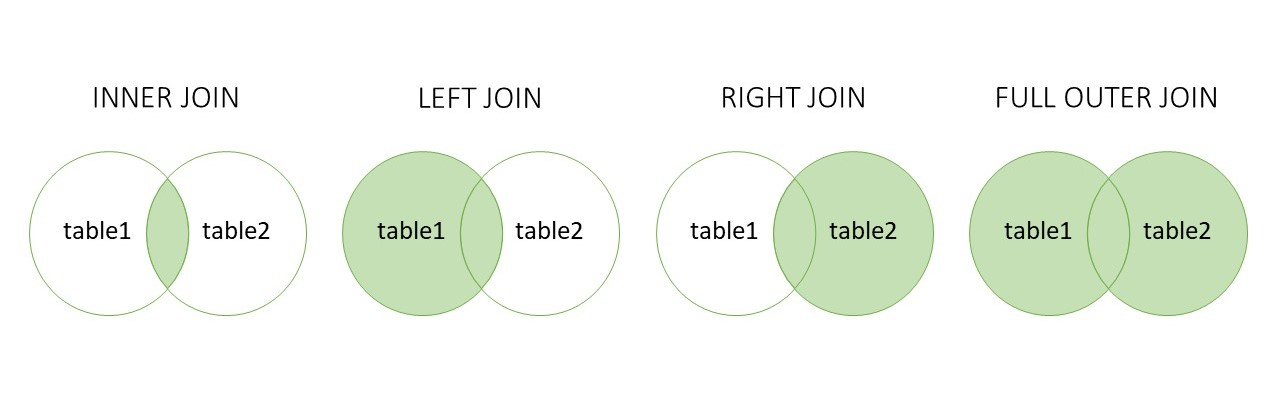

### **SQL INNNER JOIN Keyword**

SQL INNER JOIN KeyWord

The `INNER JOIN` keyword selects records that have matching values in both tables.



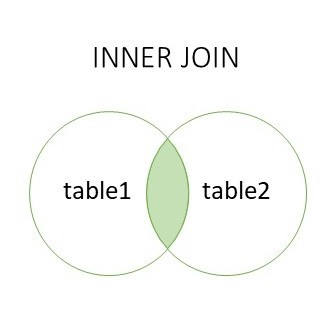

**INNER JOIN Syntax**

> SELECT Column_name(s)

> FROM table1

> INNER JOIN table2

> ON table1.column_name = table2.column_name;

Below is a selection from the "Orders" table:

In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


And a selection from the "Customers" table:

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**SQL INNER JOIN Example**



**Example**

The following SQL statement selects all orders with customer information:

> SELECT Orders.OrderID, Customers.CustomerName

> FROM Orders

> INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID;

In [ ]:
%%sql
SELECT Orders.OrderID, Customers.CustomerName
FROM Orders
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerName
10001,John Thomas Red
10002,Yuēhàn Hóng
10003,Johanna DasGold
10004,Hannes ljusblå
10005,George Cross
10006,Khojorn SeeKhaw
10007,Iain Andrew
10008,Jan Martijn Oranje
10009,Ivana Del Cielo
10010,Jaime Verde Aguila


**Note:** The `INNER JOIN` keyword selects all rows from both tables as long as there is a match between the columns. If there are records in the "Orders" table that do not have matches in "Customers", these orders will not be shown! 

**JOIN Three Tables**

**Example**

The following SQL statement selects all orders with customer and shipper information:

> SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName

> FROM ((Order

> INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)

> INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperName);

In [ ]:
%%sql
SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
FROM ((Orders
INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID)
INNER JOIN Shippers ON Orders.ShipperID=Shippers.ShipperName);

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerName,ShipperName
10001,John Thomas Red,NA
10002,Yuēhàn Hóng,AE
10003,Johanna DasGold,EW1
10004,Hannes ljusblå,EN2
10005,George Cross,EN1
10006,Khojorn SeeKhaw,ASE
10007,Iain Andrew,EN1
10008,Jan Martijn Oranje,EW2
10009,Ivana Del Cielo,ES1
10010,Jaime Verde Aguila,SA


### **SQL LEFT JOIN Keyword**



SQL LEFT JOIN Keyword

The `LEFT JOIN` keyword returns all records from the left table (table1), and the matching records from the right table (table2). The result is 0 records from the right side, if there is no match.

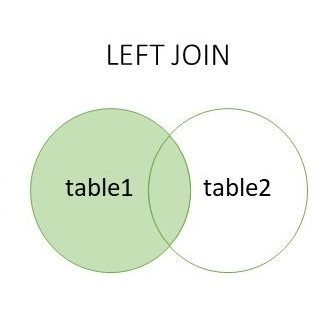

**LEFT JOIN Syntax**

> SELECT Column_name(s)

> FROM table1

> LEFT JOIN table2

> ON table1.column_name = table2.column_name;

**Note:** In some databases `LEFT JOIN` is called `LEFT OUTER JOIN`.

Below is a selection from the "Customers" table:

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


And a selection from the "Orders" table:


In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


**SQL LEFT JOIN Example**


**Example**

The following SQL statement will select all customers, and any order they might have:

> SELECT Customers.CustomerName, Orders.OrderID

> FROM Customers

> LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID

> ORDER BY Customers.CustomerName;

In [ ]:
%%sql
SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,OrderID
Canthr Arunbeikfa,10029
Canthr Arunbeikfa,10086
Conan Groenstroken,10025
Conan Groenstroken,10082
George Cross,10005
George Cross,10059
Gianni Azzuro,10017
Gianni Azzuro,10052
Giannina Della Libertà,10030
Giannina Della Libertà,10087


**Note:** The `LEFT JOIN` keyword returns all records from the left table(Customers), even if there are no matches in the right table (Orders).

### **SQL RIGHT JOIN Keyword**


SQL RIGHT JOIN Keyword

The `RIGHT JOIN` keyword returns all records from the right table(table2), and the matching records from the left table(table1). The result is 0 records from the left side, if there is no match.

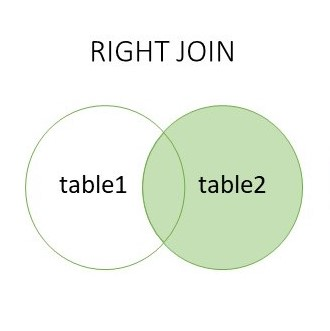

**RIGHT JOIN Syntax**

> SELECT column_name(s)

> FROM table1

> RIGHT JOIN table2

> ON table1.column_name = table2.column_name;

**Note:** In some databases `RIGHT JOIN` is called `RIGHT OUTER JOIN`.

Below is a selection from the "Order" table:

In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


And a selection from the "Employees" table:

In [ ]:
%sql SELECT * FROM Employees LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


EmployeeID,fName,lName,Sex,bType,Height,Weight,Nationality
0,Niklaust,None,None,None,None,None,None
1,Natty,Dahla,f,o,169,53,Thai
2,Jaime,Nopales,m,ab,183,90,Spanish
3,Andy,Hai Ai,m,a,182,84,Chinese
4,Julia,Erica,f,b,172,58,American


**SQL RIGHT JOIN Example**



**ERROR:** sqlite3.OperationalError RIGHT and FULL OUTER JOINs are not currently supported

**Example**

The following SQL statement will return all employees, and any orders they might have placed:

> SELECT Orders.OrderID, Employees.LastName, Employees.FirstName

> FROM Orders

> RIGHT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID

> ORDER BY Orders.OrderID;

In [ ]:
%%sql 
SELECT Orders.OrderID, Employees.lName, Employees.fName
FROM Orders
LEFT JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID
ORDER BY Orders.OrderID;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,lName,fName
10001,Erica,Julia
10002,Hai Ai,Andy
10003,Tusche,Jakob
10004,Seger,Tomas
10005,Glade,Philip
10006,Dahla,Natty
10007,Glade,Philip
10008,Ladened,Pieter
10009,Ala,Giovanni
10010,Amice,Madeleine Maria


**Note:** The `RIGHT JOIN` keyword returns all records from the right table (Employees), even if there are no matches in the left table(Orders).

### **SQL FULL OUTER JOIN Keyword**



**ERROR:** sqlite3.OperationalError RIGHT and FULL OUTER JOINs are not currently supported

SQL FULL OUTER JOIN Keyword

The `FULL OUTER JOIN` keyword returns all records when there is a match in left(table1) or right(table2) table records.


**Tip:** `FULL OUTER JOIN` and `FULL JOIN` are the same.

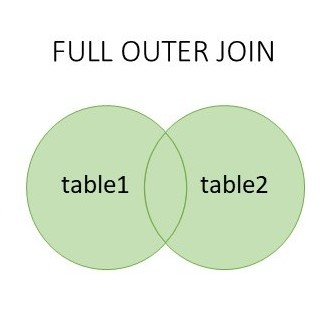

**FULL OUTER JOIN Syntax**

> SELECT column_name(s)

> FROM table1

> FULL OUTER JOIN table2

> ON table1.column_name = table2.column_name

> WHERE condition;

**Note:** `FULL OUTER JOIN` can potentially return very large result-sets!

Below is a selection from the "Customers" table:

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


And a selection from the "Orders" table:

In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


**SQL FULL OUTER JOIN Example**

The following SQL statement selects all customers, and all orders:

> SELECT Customers.CustomerName, Orders.OrderID

> FROM Customers

> FULL OUTER JOIN Orders ON Customers.CustomerID=Orders.CustomerID

> ORDER BY Customers.CustomerName;

In [ ]:
%%sql
SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,OrderID
Canthr Arunbeikfa,10029
Canthr Arunbeikfa,10086
Conan Groenstroken,10025
Conan Groenstroken,10082
George Cross,10005
George Cross,10059
Gianni Azzuro,10017
Gianni Azzuro,10052
Giannina Della Libertà,10030
Giannina Della Libertà,10087


**Note:** The `FULL OUTER JOIN` keyword returns all matching records from both tables whether the other table matches or not. So, if there are rows in "Customers" that do not have matches in "Orders", or if there are rows in "Orders" that do not have matches in "Customers", those rows will be listed as well.

### **SQL Self Join**

SQL Self Join

A self join is a regular join, but the table is joined with itself.

**Self Join Syntax**

> SELECT column_name(s)

> FROM table1 T1, table1 T2

> WHERE condition;

T1 and T2 are different table aliases from the same table.

Below is a selection from the "Customers" table

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**SQL Self Join Example**



**Example** 

The following SQL statement matches customers that are from the same city:

> SELECT A.CustomerName AS CustomerName1, B.CustomerName AS CustomerName2, A.City

> FROM Customers A, Customers B

> WHERE A.CustomerID <> B.CustomerID

> AND A.City = B.City

> ORDER BY A.City;

In [ ]:
%%sql
SELECT A.CustomerName AS CustomerName1, B.CustomerName AS CustomerName2, A.City
FROM Customers A, Customers B
WHERE A.CustomerID <> B.CustomerID
AND A.City=B.City
ORDER BY A.City;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName1,CustomerName2,City
Jamila Rissierooi,Jojo Spektrumgroen,Cape Town
Jojo Spektrumgroen,Jamila Rissierooi,Cape Town
John Gelester,Conan Groenstroken,Paramaribo
Conan Groenstroken,John Gelester,Paramaribo
Ivana Del Cielo,Giannina Della Libertà,Serravalle
Giannina Della Libertà,Ivana Del Cielo,Serravalle


## **SQL Union**

The SQL UNION Operator

The `UNION` operator is used to combine the result-set of two or more `SELECT` statements.

* Every `SELECT` statement with `UNION` must have the same number of columns
* The columns must alos have similar data types
* The columns in every `SELECT` statement must also be in the same order

**UNION Syntax**

> SELECT column_name(s) FROM table1

> UNION

> SELECT column_name(s) FROM table2;

**UNION ALL Syntax**

The `UNION` operator selects only distinct values by default. To allow duplicate values, use `UNION ALL`:

> SELECT column_name(s) FROM table1

> UNION ALL

> SELECT column_name(s) FROM table2;

**Note:** The column names in the result-set are usually equal to the column names in the first `SELECT` statement.

Below is a selection from the "Customers" table:

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


And a selection from the "Suppliers" table:

In [ ]:
%sql SELECT * FROM Suppliers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


SupplierID,Company,Address,Phone
1,Sleepytime Ltd.,"Bangkok, Thailand",+66 2 XXX XXXX
2,Sanctuary of Slumber S.A.,"Madrid, Spain",+34 913 XX XX XX
3,On a Mission N.V.,"Amsterdam, The Netherland",+31 20 XXX XXXX
4,Dozing Deco LLC,"Texas, USA",+1 409 XXX XXXX
5,"Honeymoon Suite Co., Ltd. (有限公司)","Beijing, China",+86 10 XXXX XXXX


**SQL UNION Example**

The following SQL statement returns the cities (only distinct values) from both the "Customers" and the "Suppliers" table:

> SELECT City FROM Customers

> UNION

> SELECT City FROM Suppliers

> ORDER BY City;

In [ ]:
%%sql
SELECT City FROM Customers
UNION
SELECT substr(Address, 1, instr(Address, ',') - 1) AS City FROM Suppliers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


City
Amsterdam
Ayutthaya
Bangkok
Barcelona
Beijing
Berlin
Buenos Aires
California
Cape Town
Cardiff


**Note:** If some customers or suppliers have the same city, each city will only be listed once, because `UNION` selects only distinct values. Use `UNION ALL` to also select duplicate values!

**SQL UNION ALL Example**

The following SQL statement returns the cities (duplicate values also) from both the "Customers" and the "Suppliers" table:

> SELECT City FROM Customers

> UNION ALL

> SELECT City FROM Suppliers

> ORDER BY City;

In [ ]:
%%sql
SELECT City FROM Customers
UNION ALL
SELECT substr(Address, 1, instr(Address, ',') - 1) AS City FROM Suppliers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


City
New york
Roma
Madrid
Frankfurt
Den Haag
Stockholm
Shanghai
Bangkok
Washington DC
Firenze


**SQL UNION With WHERE**

The following SQL statement returns the German cities (only distinct values) from both the "Customers" and the "Suppliers" table:

> SELECT City, Country FROM Customers

> WHERE Country='Germany'

> UNION

> SELECT City, Country FROM Suppliers

> WHERE Country='Germany'

> ORDER BY City;

In [ ]:
%%sql
SELECT substr(Address, 1, instr(Address, ',') - 1) AS City, 
       substr(Address, instr(Address, ' ') + 1 ) AS Country 
FROM Suppliers

 * sqlite:///IntheCloudsCo.sqlite
Done.


City,Country
Bangkok,Thailand
Madrid,Spain
Amsterdam,The Netherland
Texas,USA
Beijing,China
Stockholm,Sweden
Berlin,Germany
Paris,France
Milan,Italy
Munich,Germany


In [ ]:
%%sql
SELECT City, Country FROM Customers
WHERE Country='Germany'
UNION
SELECT substr(Address, 1, instr(Address, ',') - 1) AS City, 
       substr(Address, instr(Address, ' ') + 1 ) AS Country 
FROM Suppliers
WHERE Country='Germany'
ORDER BY City;

 * sqlite:///IntheCloudsCo.sqlite
Done.


City,Country
Berlin,Germany
Frankfurt,Germany
Heidelberg,Germany
Munich,Germany


**SQL UNION ALL With WHERE**

The following SQL statement returns the German cities (duplicate values also) from both the "Customers" and the "Suppliers" table:

> SELECT City, Country FROM Customers

> WHERE Country='Germany'

> UNION ALL

> SELECT City, Country FROM Suppliers

> WHERE Country='Germany'

> ORDER BY City;

In [ ]:
%%sql
SELECT City, Country FROM Customers
WHERE Country='Germany'
UNION ALL
SELECT substr(Address, 1, instr(Address, ',') - 1) AS City, 
       substr(Address, instr(Address, ' ') + 1 ) AS Country 
FROM Suppliers
WHERE Country='Germany'
ORDER BY City;

 * sqlite:///IntheCloudsCo.sqlite
Done.


City,Country
Berlin,Germany
Berlin,Germany
Frankfurt,Germany
Heidelberg,Germany
Munich,Germany


**Another UNION Example**

The following SQL statement list all Employees and suppliers:

> SELECT 'Employee' AS Type, ContactName, City, Country

> FROM Customers

> UNION

> SELECT 'Supplier',Company, City, Country

> FROM Suppliers;

In [ ]:
%%sql
SELECT 'Employee' AS Type, ContactName, City, Country
FROM Customers
UNION
SELECT 'Supplier', Company, 
      substr(Address, 1, instr(Address, ',') - 1) AS City, 
      substr(Address, instr(Address, ' ') + 1 ) AS Country 
FROM Suppliers;

 * sqlite:///IntheCloudsCo.sqlite
Done.


Type,ContactName,City,Country
Employee,Andy Hai Ai,Beijing,China
Employee,Andy Hai Ai,Shaanxi,China
Employee,Andy Hai Ai,Shanghai,China
Employee,Giovanni Ala,Firenze,Italy
Employee,Giovanni Ala,Milano,Italy
Employee,Giovanni Ala,Roma,Italy
Employee,Giovanni Ala,Serravalle,San Marino
Employee,Jaime Nopales,Barcelona,Spain
Employee,Jaime Nopales,Madrid,Spain
Employee,Jaime Nopales,Valencia,Spain


Notice the "AS Type" above - it is an alias. SQL Aliases are used to give a table or a column a temporary name. An alias only exists for the duration of the query. So, here we have created a temporary column named "Type", that list whether the contact person is a "Customer" or a "Supplier".

## **SQL GROUP BY Statement**

The SQL GROUP BY Statement

The `GROUP BY` statement groups rows that have the same values into summary rows, like "find the number of customers in each country".

The `GROUP BY` statment is often used with aggregate functions (`COUNT()`, `MAX()`, `MIN()`, `SUM()`, `AVG()`) to group the result-set by one or more columns.

**GROUP BY Syntax**

> SELECT column_name(s)

> FROM table_name

> WHERE condition

> GROUP BY column_name(s)

> ORDER BY column_name(s);



Below is a selection from the "Customers" table:

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**SQL GROUP BY Examples**

The following SQL statement lists the number of customers in each country:

> SELECT COUNT (CustomerID), Country

> FROM Customers

> GROUP BY Country;

In [ ]:
%%sql
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country;

 * sqlite:///IntheCloudsCo.sqlite
Done.


COUNT(CustomerID),Country
1,Agentina
3,Australia
1,Chile
3,China
3,Germany
1,Ireland
3,Italy
1,Mexico
2,New Zealand
1,Peru


**Example**

The following SQL statement lists the number of customers in each country, sorted high to low:

> SELECT COUNT(CustomerID), Country

> FROM Customers

> GROUP BY Country

> ORDER BY COUNT(CustomerID) DESC;

In [ ]:
%%sql
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
ORDER BY COUNT(CustomerID) DESC;

 * sqlite:///IntheCloudsCo.sqlite
Done.


COUNT(CustomerID),Country
4,UK
4,USA
3,Australia
3,China
3,Germany
3,Italy
3,Spain
3,Sweden
3,Thailand
3,The Netherland


Below is a selection from the "Orders" table:

In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


And a selection from the "Shippers" table:

In [ ]:
%sql SELECT * FROM Shippers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ShipperID,ShipperName,Description,Phone
1,ASE,Asia south-east,+66 x xxx xxxx
2,ES2,Europe south,+34 xxx xx xx xx
3,AE,Asia east,+86 xx xxxx xxxx
4,NA,North America,+1 xxx xxx xxxx
5,EW2,Europe west,+31 xx xxx xxxx


**GROUP BY With JOIN Example**

The following SQL statement lists the number of orders sent by each shipper:

> SELECT Shippers.ShipperName, COUNT(Orders.OrderID) AS NumberOfOrders FROM Orders

> LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperName

> GROUP BY ShipperName;

In [ ]:
%%sql
SELECT 
      Shippers.ShipperName AS Courier, 
      Shippers.Description AS Destination, 
      COUNT(Orders.OrderID) AS NumberOfOrders 
FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperName
GROUP BY ShipperName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


Courier,Destination,NumberOfOrders
AE,Asia east,6
AF,Africa,4
ASE,Asia south-east,6
EN1,Europe north,10
EN2,Europe north,6
ES1,Europe south,10
ES2,Europe south,6
EW1,Europe west,6
EW2,Europe west,10
NA,North America,6


## **SQL HAVING Clause**

The SQL HAVING Clause

The `HAVING` clause was added to SQL because the `WHERE` keyword cannot be used with aggregate functions.

**HAVING Syntax**

> SELECT column_name(s)

> FROM table_name

> WHERE condition

> GROUP BY column_name(s)

> HAVING condition

> ORDER BY column_name(s);

Below is a selection from the "Customers" table

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**SQL HAVING Examples**

The following SQL statement lists the number of customers in each country. Only include countries with more than 3 customers:

> SELECT COUNT(CustomerID), Country

> FROM Customers

> GROUP BY Country

> HAVING COUNT(CustomerID) > 3;

In [ ]:
%%sql
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 3;

 * sqlite:///IntheCloudsCo.sqlite
Done.


COUNT(CustomerID),Country
4,UK
4,USA


**Example**

> SELECT COUNT(CustomerID), Country

> FROM Customers

> GROUP BY Country

> HAVING COUNT(CustomerID) > 2 

> ORDER BY COUNT(CustomerID) DESC;

In [ ]:
%%sql
SELECT COUNT(CustomerID), Country
FROM Customers
GROUP BY Country
HAVING COUNT(CustomerID) > 2
ORDER BY COUNT(CustomerID) DESC;

 * sqlite:///IntheCloudsCo.sqlite
Done.


COUNT(CustomerID),Country
4,UK
4,USA
3,Australia
3,China
3,Germany
3,Italy
3,Spain
3,Sweden
3,Thailand
3,The Netherland


Below is a selection from the "Orders" table:

In [ ]:
%sql SELECT * FROM Orders LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
10001,1,4,2020-01-01,NA
10002,7,3,2020-01-07,AE
10003,12,7,2020-01-31,EW1
10004,22,8,2020-02-05,EN2
10005,35,9,2020-02-11,EN1


And a selection from the "Employees" table:

In [ ]:
%sql SELECT * FROM Employees LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


EmployeeID,fName,lName,Sex,bType,Height,Weight,Nationality
0,Niklaust,None,None,None,None,None,None
1,Natty,Dahla,f,o,169,53,Thai
2,Jaime,Nopales,m,ab,183,90,Spanish
3,Andy,Hai Ai,m,a,182,84,Chinese
4,Julia,Erica,f,b,172,58,American


**MORE HAVING Examples**

**Example**

The following SQL statement lists the employees that have registered more than 7 orders:

> SELECT Employees.lName, COUNT(Orders.OrderID) AS NumberOfOrders

> FROM (Orders

> INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID)

> GROUP BY lName

> HAVING COUNT(Orders.OrderID) > 7;

In [ ]:
%%sql
SELECT Employees.lName, COUNT(Orders.OrderID) AS NumberOfOrders
FROM (Orders
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID)
GROUP BY lName
HAVING COUNT(Orders.OrderID) > 7;

 * sqlite:///IntheCloudsCo.sqlite
Done.


lName,NumberOfOrders
Ala,10
Amice,8
Glade,10
Ladened,10
Lariats,10


The following SQL statement lists if the employees "Erica" or "Amice" have registered more than 6 orders:

**Example**

> SELECT Employees.lName, COUNT(Orders.OrderID) AS NumberOfOrders

> FROM Orders

> INNER JOIN Employees ON Orders.EmployeeID = 
Employees.EmployeeID

> WHERE lName = 'Erica' OR lName = 'Amice'

> GROUP BY lName

> HAVING COUNT(Orders.OrderID) > 5;

In [ ]:
%%sql
SELECT Employees.lName, COUNT(Orders.OrderID) AS NumberOfOrders
FROM Orders
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
WHERE lName = 'Erica' OR lName = 'Amice'
GROUP BY lName
HAVING COUNT(Orders.OrderID) > 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


lName,NumberOfOrders
Amice,8
Erica,6


## **SQL EXISTS Operator**

The SQL EXISTS Operator

The `EXISTS` operator is used to test for the existence of any record in a subquery

The `EXISTS` operator returns TRUE if the subquery reurns one or more records.

**EXISTS Syntax**

> SELECT column_name(s)

> FROM table_name

> WHERE EXISTS

> (SELECT column_name FROM table_name WHERE condition);

Below is a selection from the "Products" table:

In [ ]:
%sql SELECT * FROM Products LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
1,Sleepytime Single Bed,1,B1,38X75 in,420
2,Sleepytime Dresser,1,W1,60X40X20 in,300
3,Sleepytime Nightstand,1,W2,44X40X20 in,300
4,Sleepytime Lamp,1,L1,15 in,200
5,Sanctuary of Slumber Bed,2,B1,38X75 in,600


And a selection from the "Suppliers" table:

In [ ]:
%sql SELECT * FROM Suppliers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


SupplierID,Company,Address,Phone
1,Sleepytime Ltd.,"Bangkok, Thailand",+66 2 XXX XXXX
2,Sanctuary of Slumber S.A.,"Madrid, Spain",+34 913 XX XX XX
3,On a Mission N.V.,"Amsterdam, The Netherland",+31 20 XXX XXXX
4,Dozing Deco LLC,"Texas, USA",+1 409 XXX XXXX
5,"Honeymoon Suite Co., Ltd. (有限公司)","Beijing, China",+86 10 XXXX XXXX


**SQL EXISTS Examples**

The following SQL statement returns TRUE and lists the suppliers with a product price less than 1000:

> SELECT SupplierName

> FROM Suppliers

> WHERE EXISTS (SELECT ProductName FROM Products WHERE Products.SupplierID = Suppliers.supplierID AND Price < 1000);

In [ ]:
%%sql 
SELECT Company as SupplierName
FROM Suppliers
WHERE EXISTS(SELECT ProductName FROM Products 
      WHERE Products.SupplierID = Suppliers.supplierID AND Price < 1000);

 * sqlite:///IntheCloudsCo.sqlite
Done.


SupplierName
Sleepytime Ltd.
Sanctuary of Slumber S.A.
On a Mission N.V.
Dozing Deco LLC
"Honeymoon Suite Co., Ltd. (有限公司)"
Stäncké AB
Fancy Abbey S.à r.l.
Groovy Dreams AG


**Example**

The following SQL statement returns TRUE and lists the suppliers with a product price equal to 1200:

> SELECT SupplierName

> FROM Suppliers

> WHERE EXISTS (SELECT ProductName FROM Products WHERE Products.SupplierID = Suppliers.supplierID AND Price = 1200);

In [ ]:
%%sql 
SELECT Company as SupplierName
FROM Suppliers
WHERE EXISTS(SELECT ProductName FROM Products 
      WHERE Products.SupplierID = Suppliers.supplierID AND Price = 1200);

 * sqlite:///IntheCloudsCo.sqlite
Done.


SupplierName
On a Mission N.V.
Fancy Abbey S.à r.l.


## **SQL ANY and ALL Operators**

The SQL ANY and ALL Operators

The `ANY` and `ALL` operators allow you to perform a comparision between a single column value and a range of other values.

**ERROR:** sqlite3.OperationalError ALL, ANY

Below is a selection from the "Products" table:

In [ ]:
%sql SELECT * FROM Products LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
1,Sleepytime Single Bed,1,B1,38X75 in,420
2,Sleepytime Dresser,1,W1,60X40X20 in,300
3,Sleepytime Nightstand,1,W2,44X40X20 in,300
4,Sleepytime Lamp,1,L1,15 in,200
5,Sanctuary of Slumber Bed,2,B1,38X75 in,600


Below is a selection from the "OrderDetails" table:

In [ ]:
%sql SELECT * FROM OrderDetails LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderDetailID,OrderID,ProductID,Quantity
1,9901,37,2
2,9901,36,1
3,9901,38,1
4,9902,54,2
5,9902,52,1


### The SQL ANY Operator

The `ANY` operator:

* returns a boolean value as a result
* return TRUE if ANY of the subquery values meet the condition

`ANY` means that the condition will be true if the operation is true for any of the values in the range.

**ANY Syntax**

> SELECT column_name(s)

> FROM table_name

> WHERE column_name operator ANY

> (SELECT column_name

> FROM table_name

> WHERE condition);

**Note:** The operator must be a standard comparison operator (=, <>, !=, >, >=, <, or <=).

**SQL ANY Examples**

The following SQL statement lists the ProductName if it find ANY records in the OrderDetails table has Quantity equal to 5 (this will return TRUE because the Quantity column has some values of 5):

> SELECT ProductName

> FROM Products

> WHERE ProductID = ANY

>> (SELECT ProductID

>> FROM OrderDetails

>> WHERE Quantity = 5);

In [ ]:
%%sql
SELECT ProductName
FROM Products
WHERE  ProductID IN (SELECT ProductID FROM OrderDetails WHERE Quantity=5);

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName
Eau du Odor Beauty Tray
Fancy Abbey Nightstand


**Example**

The following SQL statement lists the ProductName if it find ANY records in the OrderDetails table has Quantity larger than 4 (this will return TRUE because the Quantity column has some values larger than 4):

> SELECT ProductName

> FROM Products

> WHERE ProductID = ANY

> (SELECT ProductID

> FROM OrderDetails

> WHERE Quantity > 4);

In [ ]:
%%sql
SELECT ProductName
FROM Products
WHERE ProductID IN (SELECT ProductID FROM OrderDetails WHERE Quantity > 4);

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName
Sanctuary of Slumber Wall Mirror
Eau du Odor Beauty Tray
Stäncké Mirror
Fancy Abbey Sundrop Wall Sconce
Fancy Abbey Nightstand


**Example**

The following SQL statment lists the ProductName if it find ANY records in the OrderDetails table has Quantity larger than 5 (this will return FALSE because the Quantity column has no values larger than 5):

> SELECT ProductName

> FROM Products

> WHERE ProductID = ANY

> (SELECT ProductID

> FROM OrderDetails

> WHERE Quantity > 5);

In [ ]:
%%sql
SELECT ProductName
FROM Products
WHERE ProductID IN (SELECT ProductID FROM OrderDetails WHERE Quantity > 5);

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName
Sanctuary of Slumber Wall Mirror
Stäncké Mirror
Fancy Abbey Sundrop Wall Sconce


### The SQL ALL Operator


The `ALL` Operator:

* returns a boolean value as a result

* returns TRUE if ALL of the subquery values meet the condition

* is used with `SELECT`, `WHERE` and `HAVING` statements

`ALL` means that the condition will be true only if the operation is true for all values in the range.

**ALL Syntax With SELECT**

> SELECT ALL column_name(s)

> FROM table_name

> WHERE condition;

**ALL Syntax With WHERE or HAVING**

> SELECT Column_name(s)

> FROM table_name

> WHERE column_name operator ALL

> (SELECT column_name

> FROM table_name

> WHERE condition);

**Note:** The operator must be a standard comparision operator  (=, <>, !=, >, >=, <, or <=).

**SQL ALL Examples**

The following SQL statement lists ALL the product names:

> SELECT ALL ProductName

> FROM Products

> WHERE TRUE;

In [ ]:
%%sql
SELECT ALL ProductName
FROM Products
WHERE 1;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName
Sleepytime Single Bed
Sleepytime Dresser
Sleepytime Nightstand
Sleepytime Lamp
Sanctuary of Slumber Bed
Sanctuary of Slumber Wall Mirror
Sanctuary of Slumber Dresser
Sanctuary of Slumber Bedside Lamp
Cascade curtains
Restful Rustic Lamp


**Example**

The following SQL statement lists the ProductName if ALL the records in the OrderDetails table has Quantity equal to 5. This will of course return FALSE becuase the Quantity column has many different values (not only the value of 5):


> SELECT ProductName

> FROM Products

> WHERE ProductID = ALL

> (SELECT ProductID

> FROM OrderDetails

> WHERE Quantity = 5);

In [ ]:
%%sql
SELECT ProductName
FROM Products
WHERE ProductID IN (SELECT ProductID FROM OrderDetails WHERE Quantity = 5);

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName
Eau du Odor Beauty Tray
Fancy Abbey Nightstand


## **SQL SELECT INTO Statement**

The SQL SELECT INTO Statement

The `SELECT INTO` statement copies data from one table into a new table.




**SELECT INTO Syntax**

Copy all columns into a new table:

> SELECT * 

> INTO newtable [IN externaldb]

> FROM oldtable

> WHERE condition;

copy only some columns into a new table:

> SELECT column1, column2, column3, ...

> INTO newtable [IN externaldb]

> FROM oldtable

> WHERE condition;

The new table will be created with the column-names and types as defined in the old table. You can create new column names using the `AS` clause.

**SQL SELECT INTO Examples**

The following SQL statement creates a backup copy of Customers:

> SELECT * INTO CustomersBackup2022

> FROM Customers;

The following SQL statement uses the `IN` clause to copy the table into a new table in another database:

> SELECT * INTO CustomersBackup2022 IN 'Backup.db'

> FROM Customers;

The following SQL statement copies only a few columns into a new table:

> SELECT CustomerName, ContactName INTO CustomersBackup2022

> FROM Customers;

The following SQL statement copies only the German customers into a new table:

> SELECT * INTO CustomersGermany

> FROM Customers

> WHERE Country = 'Germany';

The following SQL statement copies data from more than one table into a new table:

> SELECT Customers.CustomerName, Orders.OrderID

> INTO CustomersOrderBackup2022

> FROM Customers

> LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID;

**Tip:** `SELECT INTO` can also be used to create a new, empty table using the schema of another. Just add a `WHERE` clause that causes the query to return no data:



> SELECT * INTO newtable

> FROM oldtable

> WHERE 1 = 0;

## **SQL INSERT INTO SELECT Statement**

The `INSERT INTO SELECT` statement copies data from one table and inserts it into another table.

The `INSERT INTO SELECT` statment requires that the data types in source and target table match.

**Note:** The existing records in the target table are unaffected.

**INSERT INTO SELECT Syntax**

Copy all columns from one table to another table:

> INSERT INTO table2

> SELECT * FROM table1

> WHERE condition;

Copy only some columns from one table into another table:

> INSERT INTO table2 (column1, column2, column3, ...)

> SELECT column1, column2, column3, ...

> FROM table1

> WHERE condition;

Below is a selection from the "Customers" table:


In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


And a selection from the "Suppliers" table:



In [ ]:
%sql SELECT * FROM Suppliers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


SupplierID,Company,Address,Phone
1,Sleepytime Ltd.,"Bangkok, Thailand",+66 2 XXX XXXX
2,Sanctuary of Slumber S.A.,"Madrid, Spain",+34 913 XX XX XX
3,On a Mission N.V.,"Amsterdam, The Netherland",+31 20 XXX XXXX
4,Dozing Deco LLC,"Texas, USA",+1 409 XXX XXXX
5,"Honeymoon Suite Co., Ltd. (有限公司)","Beijing, China",+86 10 XXXX XXXX


**SQL INSERT INTO SELECT Examples**

The following SQL statement copies "Suppliers" into "Customers" (the columns that are not filled with data, will contain NULL):

> INSERT INTO Customers (CustomerName, City, Country)

> SELECT SupplierName, City, Country FROM Suppliers;

In [ ]:
# %%sql
# INSERT INTO Customers(CustomerName, City, Country)
# SELECT  Company, 
#         substr(Address, 1, instr(Address, ',') - 1) AS City, 
#         substr(Address, instr(Address, ' ') + 1 ) AS Country 
# FROM Suppliers;

**Example**

The following SQL statement copies "Suppliers" into "Customers" (fill all columns):

> INSERT INTO Customers (CustomerName, ContactName, Address, City, PostalCode, Country)

> SELECT SupplierName, ContactName, Address, City, PostalCode, Country FROM Suppliers;

In [ ]:
# %%sql
# INSERT INTO Customers(CustomerName, ContactName, Address, City, PostalCode, Country)
# SELECT  Company, 
# 		    'NULL' AS ContactName,
# 		    'NUlL' AS Address,
#         substr(Address, 1, instr(Address, ',') - 1) AS City, 
# 		    'NULL' AS PostalCode,
#         substr(Address, instr(Address, ' ') + 1 ) AS Country 
# FROM Suppliers;

**Example**

The following SQL statement copies only the German suppliers into "Customers".

> INSERT INTO Customers (CustomerName, City, Country)

> SELECT SupplierName, City, Country FROM Suppliers

> WHERE Country='Germany';

In [ ]:
# %%sql
# INSERT INTO Customers (CustomerName, City, Country)
# SELECT  Company, 
#         substr(Address, 1, instr(Address, ',') - 1) AS City,  		    
#         substr(Address, instr(Address, ' ') + 1 ) AS Country 
# FROM Suppliers WHERE Country='Germany';

## **SQL CASE Expression**

The SQL CASE Expression

The `CASE` expression goes through conditions and returns a value when the first condition is met (like an if-then-else statement). So, once a condition is true, it will stop reading and return the result. If no conditions are true, it returns the value in the `ELSE` clause.

If there is no `ELSE` part and no conditions are true, it returns NULL.

**CASE Syntax**

> CASE 

>> WHEN condition1 THEN result1

>> WHEN condition2 THEN result2

>> WHEN conditionN THEN resultN

>> ELSE result

> END;

Below is a selection from the "OrderDetails" table:

In [ ]:
%sql SELECT * FROM OrderDetails LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderDetailID,OrderID,ProductID,Quantity
1,9901,37,2
2,9901,36,1
3,9901,38,1
4,9902,54,2
5,9902,52,1


**SQL CASE Examples**

The following SQL goes through conditions and returns a value when the first condition is met:

> SELECT OrderID, Quantity,

> CASE 

>> WHEN Quantity > 2 THEN 'The quantity is greater than 2'

>> WHEN Quantity = 2 THEN 'The quantity is 2'

>> ELSE 'The quantity is just 1'

> END AS QuntityText

> FROM OrderDetails;

In [ ]:
%%sql
SELECT OrderID, Quantity, 
CASE 
    WHEN Quantity > 2 THEN 'The quantity is greater than 2'
    WHEN Quantity = 2 THEN 'The quantity is 2'
    ELSE 'The quantity is just 1'
END AS QuantityText
FROM OrderDetails LIMIT 15;

 * sqlite:///IntheCloudsCo.sqlite
Done.


OrderID,Quantity,QuantityText
9901,2,The quantity is 2
9901,1,The quantity is just 1
9901,1,The quantity is just 1
9902,2,The quantity is 2
9902,1,The quantity is just 1
9902,2,The quantity is 2
9902,1,The quantity is just 1
9903,1,The quantity is just 1
9903,1,The quantity is just 1
9903,1,The quantity is just 1


**Example**

The following SQL will order the customers by City. However, if City is NULL, then order by Country:


> SELECT CustomerName, City, Country

> FROM Customers

> ORDER BY

> (CASE

>> WHEN City IS NULL THEN Country

>> ELSE City

> END);


In [ ]:
%%sql
SELECT CustomerName, City, Country
FROM Customers
ORDER BY
(CASE
    WHEN City IS NULL THEN Country
    ELSE City
END) LIMIT 10;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,City,Country
Jannetje Hetwit,Amsterdam,The Netherland
Canthr Arunbeikfa,Ayutthaya,Thailand
Kajorn Fakhaw,Bangkok,Thailand
Jon Calos Amarilla,Barcelona,Spain
Qiáo Huáng xīng,Beijing,China
Johanna DasGold,Berlin,Germany
Javier Manuel de Mayo,Buenos Aires,Agentina
Janet White,California,USA
Jamila Rissierooi,Cape Town,South Africa
Jojo Spektrumgroen,Cape Town,South Africa


## **SQL NULL Functions**

SQL IFNULL(), ISNULL(), COALESCE(), and NVL() Functions



Suppose that the "UnitsOnOrder" column is optinal, and many contain NULL values.

Look at the following SELECT statement:

> SELECT ProductName, UnitPrice * (UnitsInStock + UnitsOnOrder)

> FROM Products;

In the example above, if any of the "UnitsOnOrder" values are NULL, the result will be NULL.

**Solutions**



**MySQL**

The MySQL `IFNULL()` function lets you return an alternative value if an expression is NULL:

> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * IFNULL(o.Quantity,0) AS Total

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;

In [ ]:
%%sql
SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * IFNULL(o.Quantity,0) AS Total 
FROM   OrderDetails AS o, Products AS p
WHERE  o.ProductID = p.ProductID LIMIT 10;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName,Price/Unit,OrderID,Quantity,Total
Sleepytime Mirror,1900,9901,2,3800
Sleeptime Double,2800,9901,1,2800
Sleekly Swedish Dresser,2700,9901,1,2700
Mod & Modest Corner Unit,300,9902,2,600
Uptown Glitz Double Bed,2800,9902,1,2800
Lift Table Lamp,310,9902,2,620
It's All You Dresser,440,9902,1,440
Urban Joy Painting,390,9903,1,390
Sleepytime Lamp,200,9903,1,200
Sunburst Rug,80,9903,1,80


or we can use the `COALESCE()` function, like this:

> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * COALESCE(o.Quantity,0) AS Total 

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;

In [ ]:
%%sql
SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * COALESCE(o.Quantity,0) AS Total 
FROM   OrderDetails AS o, Products AS p
WHERE  o.ProductID = p.ProductID LIMIT 10;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductName,Price/Unit,OrderID,Quantity,Total
Sleepytime Mirror,1900,9901,2,3800
Sleeptime Double,2800,9901,1,2800
Sleekly Swedish Dresser,2700,9901,1,2700
Mod & Modest Corner Unit,300,9902,2,600
Uptown Glitz Double Bed,2800,9902,1,2800
Lift Table Lamp,310,9902,2,620
It's All You Dresser,440,9902,1,440
Urban Joy Painting,390,9903,1,390
Sleepytime Lamp,200,9903,1,200
Sunburst Rug,80,9903,1,80


**SQL Server**

The SQL Server `ISNULL()` function lets you return an alternative value when an expression is NULL:

> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * ISNULL(o.Quantity,0) AS Total

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;


or we can use the `COALESCE()` function, like this:

> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * COALESCE(o.Quantity,0) AS Total 

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;

**MS Access**

The MS Access `IsNull()` function returns TRUE (-1) if the expression is a null value, otherwise FALSE (0):


> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * IIF(IsNULL(o.Quantity),0, o.Quantity)) AS Total

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;

**Oracle**

The Oracle `NVL()` function achieves the same result:


> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * NVL(o.Quantity,0) AS Total

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;

or we can use the `COALESCE()` function, like this:

> SELECT p.ProductName, p.Price AS 'Price/Unit', o.OrderID, o.Quantity,  p.Price * COALESCE(o.Quantity,0) AS Total 

> FROM   OrderDetails AS o, Products AS p

> WHERE  o.ProductID = p.ProductID LIMIT 10;

## **SQL Stored Prodcedures for SQL Server**

**ERROR**  sqlite3.OperationalError

What is a Stored Procedure?

* A stored procedure is a prepared SQL code that you can save, so the code can be reused over and over again.

* So if you have an SQL query that you write over and over again, save it as a stored procedure, and then just call it to execute it.

* You can also pass parameters to a stored procdure, so that the stored procedure can act based on the parameter value(s) that is passed.

**Stored Procedure Syntax**

> CREATE PROCEDURE procedure_name

> AS 

> sql_statement

> GO;

**Execute a Stored Procedure**

> EXEC procedure_name;

Below is a selection from the "Customers" table:

In [ ]:
%sql SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**Stored Procedure Example**

The following SQL statement creates a stored procedure named "SelectAllCustomers" that selects all records from the "Customers" table:

> CREATE PROCEDURE SelectAllCustomers

> AS 

> SELECT * FROM Customers

> GO;

**Example**

Execure the stored procedure above as follows:

> EXEC SelectAllCustomers;

**Stored Procedure With Multiple Parameters**

Setting up multiple parameters is very easy. Just list each parameter and the data type separated by a comma as shown below

**Example**

The following SQL statement creates a stored procedure that selects Customers from a particular City with a particular PostalCode from the "Customers" table:

> Create PROCEDURE SelectallCustomers @City navarchar(30),@PostalCode nvarchar(10) 

> AS 

> SELECT * FROM Customers WHERE City = @City AND PostalCode = @PostalCode

> GO;

**Example**

Execute the stored procedure above as follows:

> EXEC SelectAllCustomers @City = 'London', @PostalCode = 'WA1 1DP';

## **SQL Comments**

SQL Comments

Comments are used to explain sections of SQL statements, or to prevent execution of SQL statements.

**Note:** Comments are not supported in Microsoft Access databases.

## **Single Line Comments**

Single line comments start with `--`

Any text between `--` and the end of the line will be ignored (will not be executed).


The following example uses a single-line comment as an explanation:


**Example**

> --Select all:

> SELECT * FROM Customers;

In [ ]:
%%sql
--Select all:
SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**Example**

The following example uses a single-line comment to ignore the end of a line:

> SELECT * FROM Customers -- WHERE City='Berlin';

In [ ]:
%%sql
SELECT * FROM Customers -- WHERE city = 'Berlin'
LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**Example**

The following example uses a single-line comment to ignore a statement:

> --SELECT * FROM Customers;

> SELECT * FROM Products;

In [ ]:
%%sql
--SELECT * FROM Customers;
SELECT * FROM Products LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


ProductID,ProductName,SupplierID,CategoryID,Unit,Price
1,Sleepytime Single Bed,1,B1,38X75 in,420
2,Sleepytime Dresser,1,W1,60X40X20 in,300
3,Sleepytime Nightstand,1,W2,44X40X20 in,300
4,Sleepytime Lamp,1,L1,15 in,200
5,Sanctuary of Slumber Bed,2,B1,38X75 in,600


## **Multi-line Commnets**



Multi-line comments start with `/*` and end with `*/`

Any text between `/*` and `*/` will be ignored.



**Example**

The following example uses a multi-line comment as an explanation:

> /* Select all the columns

> of all the records

> in the Customers table: */

> SELECT * FROM Customers;

In [ ]:
%%sql
/*Select all the columns
of all the records
in the Customers table:*/
SELECT * FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA
2,Gianni Azzuro,Giovanni Ala,Via Lazio,Roma,00187,Italy
3,Juan Maria Rojo,Jaime Nopales,Calle del Amor de Dios,Madrid,28014,Spain
4,Jorge Schwarz,Jakob Tusche,Alfons-Goppel-Straße,Frankfurt,80539,Germany
5,Jan Martijn Oranje,Pieter Ladened,Zeestraat,Den Haag,2525,The Netherland


**Example**

The following example uses a multi-line comment to ignore many statements:

> /* SELECT * FROM Customers;

> SELECT * FROM  Products;

> SELECT * FROM Orders;

> SELECT * FROM Categories; */

> SELECT * FROM Suppliers;


**Note:** To ignore just a part of a statement, also use the /* */ comment.

In [ ]:
%%sql
/* SELECT * FROM Customers;
SELECT * FROM  Products;
SELECT * FROM Orders;
SELECT * FROM Categories; */
SELECT * FROM Suppliers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


SupplierID,Company,Address,Phone
1,Sleepytime Ltd.,"Bangkok, Thailand",+66 2 XXX XXXX
2,Sanctuary of Slumber S.A.,"Madrid, Spain",+34 913 XX XX XX
3,On a Mission N.V.,"Amsterdam, The Netherland",+31 20 XXX XXXX
4,Dozing Deco LLC,"Texas, USA",+1 409 XXX XXXX
5,"Honeymoon Suite Co., Ltd. (有限公司)","Beijing, China",+86 10 XXXX XXXX


**Example**

The following example uses a comment to ignore part of a line:

> SELECT CustomerName, /* City, */ Country FROM Customers; 

In [ ]:
%sql SELECT CustomerName, /*City,*/ Country FROM Customers LIMIT 5;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerName,Country
John Thomas Red,USA
Gianni Azzuro,Italy
Juan Maria Rojo,Spain
Jorge Schwarz,Germany
Jan Martijn Oranje,The Netherland


**Example**

The following example uses a comment to ignore part of a statement:

> SELECT * FROM Customers WHERE (CustomerName LIKE 'J%'

> OR CustomerName LIKE 'R%' /*OR CustomerName LIKE 'S%'

> OR CustomerName LIKE 'T%' */ OR CustomerName LIKE 'W%')

> AND Country='USA'

> ORDER BY CustomerName;

In [ ]:
%%sql
SELECT * FROM Customers WHERE (CustomerName LIKE 'J%'
OR CustomerName LIKE 'R%' /*OR CustomerName LIKE 'S%'
OR CustomerName LIKE 'T%'*/ OR CustomerName LIKE 'W%')
AND Country='USA'
ORDER BY CustomerName;

 * sqlite:///IntheCloudsCo.sqlite
Done.


CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
17,Janet White,Julia Erica,"Hollywood Boulevard, Los Angeles",California,90027,USA
45,Jason Lonestar,Madeleine Maria Amice,Commerce Street,Texas,75202,USA
1,John Thomas Red,Julia Erica,6 Avenue,New york,10019,USA


## **SQL Arithmetic Operators**

<table>
  <tr>
    <th colspan="2"><h2>SQL Arithmetic Operators</h2></th>
  </tr>
  <tr>
    <th>Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><center>+</center></td>
    <td>Add</td>
  </tr>
  <tr>
    <td><center>-</center></td>
    <td>Subtract</td>
  </tr>
  <tr>
    <td><center>*</center></td>
    <td>Multiply</td>
  </tr>
  <tr>
    <td><center>/</center></td>
    <td>Divide</td>
  </tr>
  <tr>
    <td><center>%</center></td>
    <td>Modulo</td>
  </tr> 
</table>

<table>
  <tr>
    <th colspan="2"><h2>SQL Bitwise Operators</h2></th>
  </tr>
  <tr>
    <th>Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><center>&</center></td>
    <td>Bitwise AND</td>
  </tr>
  <tr>
    <td><center>|</center></td>
    <td>Bitwise OR</td>
  </tr>
  <tr>
    <td><center>^</center></td>
    <td>Bitwise exclusive OR</td>
  </tr>
</table>

<table>
  <tr>
    <th colspan="2"><h2>SQL Comparision Operators</h2></th>
  </tr>
  <tr>
    <th>Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><center>=</center></td>
    <td>Equal to</td>
  </tr>
  <tr>
    <td><center>></center></td>
    <td>Greater than</td>
  </tr>
  <tr>
    <td><center><</center></td>
    <td>Less than</td>
  </tr>
  <tr>
    <td><center>>=</center></td>
    <td>Greater than or qual to</td>
  </tr>
  <tr>
    <td><center><=</center></td>
    <td>Less than or equal to</td>
  </tr> 
  <tr>
    <td><center><></center></td>
    <td>Not equal to</td>
  </tr> 
</table>

<table>
  <tr>
    <th colspan="2"><h2>SQL Compound Operators</h2></th>
  </tr>
  <tr>
    <th>Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><center>+=</center></td>
    <td>Add equals</td>
  </tr>
  <tr>
    <td><center>-=</center></td>
    <td>Subtract equals</td>
  </tr>
  <tr>
    <td><center>*=</center></td>
    <td>Multiply equals</td>
  </tr>
  <tr>
    <td><center>/=</center></td>
    <td>Divide equals</td>
  </tr>
  <tr>
    <td><center>%=</center></td>
    <td>Modulo equals</td>
  </tr> 
  <tr>
    <td><center>&=</center></td>
    <td>Bitwise AND equals</td>
  </tr> 
  <tr>
    <td><center>^-=</center></td>
    <td>Bitwise exclusive equals</td>
  </tr> 
  <tr>
    <td><center>|*=</center></td>
    <td>Bitwise OR equals</td>
  </tr> 
</table>

<table>
  <tr>
    <th colspan="2"><h2>SQL Logical Operators</h2></th>
  </tr>
  <tr>
    <th>Operator</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><center>ALL</center></td>
    <td>TRUE if all of the subquery values meet the condition</td>
  </tr>
  <tr>
    <td><center>AND</center></td>
    <td>TRUE if all the conditions separated by AND is TRUE</td>
  </tr>
  <tr>
    <td><center>Any</center></td>
    <td>TRUE if any ofthe subquery vlaues meet the condition</td>
  </tr>
  <tr>
    <td><center>BETWEEN</center></td>
    <td>TRUE if the operand is within the range of comparisons</td>
  </tr>
  <tr>
    <td><center>EXISTS</center></td>
    <td>TRUE if the subquery returns one or more records</td>
  </tr> 
  <tr>
    <td><center>IN</center></td>
    <td>TRUE if the operand is equal to one of a list of expressions</td>
  </tr> 
  <tr>
    <td><center>LIKE</center></td>
    <td>TRUE if the operand matches a pattern</td>
  </tr> 
  <tr>
    <td><center>NOT</center></td>
    <td>Displays a record if the condition(s) is NOT TRUE</td>
  </tr> 
  <tr>
    <td><center>OR</center></td>
    <td>TRUE if any of the conditions separated by OR is TRUE</td>
  </tr> 
  <tr>
    <td><center>SOME</center></td>
    <td>TRUE if any of the subquery values meet the condition</td>
  </tr> 
</table>

# <center><b>SQL Database</b></center>

## **SQL CREATE DATABASE Statement**


The SQL Create Database Statement

The `CREATE DATABASE` statement is used to create a new SQL database.

**Syntax**

> CREATE DATABASE databasename;

**Create Database Example**

The following SQL statement  creates a database called "testDB":

> CREATE DATABASE testDB;

**TIP:** Make sure you have admin privilege before creating any database. Once a database is created, you can check it in the list of databases with the following SQL command: `SHOW DATABASES`;

## **SQL DROP DATABASE Statement**

The SQL DROP DATABASE Statement

The `DROP DATABASE` statement is used to drop an existing SQL database.



**Syntax**

> DROP DATABASE databasename;

**Note:** Be careful before droppping a database. Deleting a database will result in loss of complete information stored in the database!

**DROP DATABASE Example**

The following SQL statement drops the existing database "testDB":

> DROP DATABASE testDB;

**Tip:** Make sure you have admin privilege before dropping any database. Once a databese is dropped, you can check it in the list of databases with the following SQL command: `SHOW DATABASES`;

## **SQL BACKUP DATABASE for SQL Server**



The SQL BACKUP DATABASE Statement

The `BACKUP DATABASE` statement is used in SQL Server to create a full back up of an existing SQL database.

**Syntax**

> BACKUP DATABASE databasename

> TO DISK = 'filepath';

The SQL BACKUP WITH DIFFERENTIAL Statement

A differential back up only backs up the parts of the database that have changed since the last full database backup.

**Syntax**

> BACKUP DATABASE databasename

> TO DISK = 'filepath'

> WITH DIFFERENTIAL;

**BACKUP DATABASE Example**

The following SQL statement create a full back up of the existing database "testDB" to the D disk:

> BACKUP DATABASE testDB

> TO DISK = 'D:\backups\testDB.bak';

**Tip:** Always back up the database to a different drive than the actual database. Then, if you get a disk crash, you will not lose your backup file along with the database.

**BACKUP WITH DIFFERENTIAL Example**

The following SQL statement creates a differential back up of the database "testDB":

> BACKUP DATABASE testDB

> TO DISK = 'D:\backups\testDB.back'

> WITH DIFFERENTIAL;

**TIP:** A diffrential back up reduces the back up time (since only the changes are backed up).

**SQL CREATE TABLE Statement**



The SQL Create TABLE Statement

The `CREATE TABLE` statement is used to create a new table in a database.



**Syntax**

> CREATE TABLE table_name (

>> Column1 datatype,

>> Column2 datatype,

>> Column3 datatype,

>> ...

> );

The column parameters specify the names of the columns of the table.

The datatype parameter specifies the type of data the column can hold (e.g. varchar, integer, date, etc.).

**Tip:** For an overview of the available data types, go to our complete Data Types Reference.

**SQL CREATE TABLE Example**

The following example creates a table called "Persons" that contains five columns: PersonID, LastName, FirstName, Address, and City:

> CREATE TABLE Persons (

>> PersonID int, 

>> LastName varchar(255),

>> FirstName varchar(255),

>> Address varchar(255),

>> City varchar(255),

> );

The PersonID column is of type int and will hold an integer.

The LastName, FirstName, Address, and City columns are of type varchar and will hold characters, and the maximum length for these fields is 255 characters.

The empty "Persons" table will now look like this:

<table>
  <tr>
    <th>PersonID</th>
    <th>LastName</th>
    <th>FirstName</th>
    <th>Address</th>
    <th>City</th>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>

**Tip:** The empty "Persons" table can now be filled with data with the SQL INSERT INTO statement.

**Create Table Using Another Table**

A copy of an existing table can also be created using `CREATE TABLE`

The new table gets the same column definitions. All columns or specific columns can be selected.

If you create a new table using an existing table, the new table will be filled with the existing values from the old table



**Syntax**

> CREATE TABLE new_table_name AS

>> SELECT column1, column2, ...

>> FROM existing_table_name

>> WHERE ...;

**Example**

The following SQL creates a new table called "TestTables" (which is a copy of the "Customers" table):

> CREATE TABLE TestTable AS

> SELECT customername, contactname

> FROM customers;

## **SQL DROP TABLE Statement**



The SQL DROP TABLE Statement

The `DROP TABLE` statement is used to drop an existing table in a database.

**Syntax**

> DROP TABLE table_name;

**Note:** Be careful before dropping a table. Deleting a table will result in loss of complete information stored in the table!

**SQL DROP TABLE Example**

The following SQL statement drops the existing table "Shippers":

> DROP TABLE shippers;

**SQL TRUNCATE TABLE**

The `TRUNCATE TABLE` statement is used to delete the data inside a table, but not the table itself.



**Syntax**

> TRUNCATE TABLE table_name;

## **SQL ALTER TABLE Statement**

SQL ALTER TABLE Statement

The `ALTER TABLE` statement is used to add, delete, or modify columns in an existing table.

The `ALTER TABLE` statement is also used to add and drop various constraints on an existing table.

**ALTER TABLE - ADD Column**

To add a column in a table, use the following syntax:

> ALTER TABLE table_name

> ADD column_name datatype;

**Example**

The following SQL adds an "Email" column to the "Customers" table:

> ALTER TABLE Customers

> ADD Email varcher(225);

**ALTER TABLE - DROP COLUMN**

To delete a column in a table, use the following syntax (notice that some database systems don't allow deleting a column):

> ALTER TABLE table_name

> DROP COLUMN column_name;

**Example**

The following SQL deletes the "Email" column from the "Customers" table:

> ALTER TABLE Customers

> DROP COLUMN Email;

**ALTER TABLE - ALTER/MODIFY COLUMN**

To change the data type of a column in a table, use the following syntax:


**SQL Server/ MS Access:**

> ALTER TABLE table_name

> ALTER COLUMN column_name datatype;

**My SQL/ Oracle (prior version 10G):**

> ALTER TABLE table_name

> MODIFY COLUMN column_name datatype;

**Oracle 10G and later:**

> ALTER TABLE table_name

> MODIFY column_name datatype;

Look at the "Persons" table:

Now we want to add a column named "DateOfBirth" in the "Persons" table.

We use the following SQL statement:

> ALTER TABLE Persons

> ADD DateOfBirth date;

Notice that the new column, "DateOfBirth", is of type date and is going to hold a date. The data type specifies what type of data the column can hold. 

The "Persons" table will now look like this:

**Change Data Type Example**

Now we want to change the data type of the column named "DateOfBirth" in the "Persons" table.

We use the following SQL statement:

> ALTER TABLE Persons

> ALTER COLUMN DateOfBirth year;

Notice that the "DateOfBirth" column is now of type year and is going to hold a year in a two- or four- digit format.

**DROP COLUMN Example**

Next, we want to delete the column named "DateOfBirth" in the "Persons" table.

We use the following SQL statement:

> ALTER TABLE Persons

> DROP COLUMN DateOfBirth;

The "Persons" table will now look like this:

## **SQL Constraints**




SQL constraints are used to specify rules for data in a table.

**SQL Create Constraints**

Constraints can be specified when the table is created with the `CREATE TABLE` statement, or after the table is created with the `ALTER TABLE` statement.

**Syntax**

> Create Table table_name (

>> column1 datatype constraint,

>> column2 datatype constraint,

>> column3 datatype constraint,

>> ....

>);

**SQL Constraints**

SQL constraints are used to specify rules for the data in a table.

Constraints are used to limit the type of data that can go into a table. This ensures the accuracy and reliability of the data in the table. If there is any violation between the constraint and the data action, the action is aborted.

Constraints can be column level or table level. Column level constraints apply to a column, and table level constraints apply to the whole table.



<table>
  <tr>
    <th colspan="2"><h2><b>The following constraints are commonly used in SQL:</b></h2></th>
  </tr>
  <tr>
    <th>Constraints</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>NOT NULL</td>
    <td>Ensures that a column cannot have a NULL value</td>
  </tr>
  <tr>
    <td>UNIQUE</td>
    <td>Ensures that all values in a column are different</td>
  </tr>
  <tr>
    <td>PRIMARY KEY</td>
    <td>A combination of a `NOT NULL` and `UNIQUE`. Uniquely identifies each row in a table</td>
  </tr>
  <tr>
    <td>FOREIGN KEY</td>
    <td>Prevents actions that would destroy links between tables</td>
  </tr>
  <tr>
    <td>CHECK</td>
    <td>Ensures that The values in a column satisfies a specific condition</td>
  </tr>
  <tr>
    <td>DEFAULT</td>
    <td>Sets a default value for a column if no value is specified</td>
  </tr>
  <tr>
    <td>CREATE INDEX</td>
    <td>Used to create and retrieve data from the database very quickly</td>
  </tr>
</table>

### **SQL NOT NULL Constraint**

SQL NOT NULL Constraint

By default, a column can hold NULL values.

The `NOT NULL` constraint enforces a column to NOT accept NULL values.

This enforces a field to always contain a value, which means that you cannot insert a new record, or update a record without adding a value to this field.

#### **SQL NOT NULL on CREATE TABLE**


The following SQL ensures that the "ID", "LastName", and "FirstName" columns will NOT accept NULL values when the "Persons" table is created:

**Syntax**


> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(225) NOT NULL,

>> FirstName varchar(255) NOT NULL,

>> Age int

>);

#### **SQL NOT NULL on ALTER TABLE**





To create a `NOT NULL` constraint on the "Age" column when the "Persons" table is already created, use the following SQL:

**SQL Server/ MS Access:**

> ALTER TABLE Persons

> ALTER CoLUMN Age int NOT NULL;

**My SQL/ Oracle (prior version 10G):**

> ALTER TABLE Persons

> MODIFY COLUMN Age int NOT NULL;

**Oracle 10G and later:**

> ALTER TABLE Persons

> MODIFY Age int NOT NULL;

### **SQL UNIQUE Constraint**

SQL UNIQUE Constraint

The `UNIQUE` constraint ensures that all values in a column are different.

Both the `UNIQUE` and `PRIMARY KEY` constraints provide a guarantee for uniqueness for a column or set of columns.

A `PRIMARY KEY` constraint automatically has a `UNIQUE` constraint.

However, you can have many `UNIQUE` constraints per table, but only one `PRIMARY KEY` constraint per table.

#### **SQL UNIQUE Constraint on CREATE TABLE**



The following SQL creates a `UNIQUE` constraint on the "ID" column when the "Persons" table is created:

**SQL Server/ Oracle / MS Access:**

> CREATE TABLE Persons (

>> ID int NOT NULL UNIQUE,

>> LastName varcher(255) NOT NULL,

>> FirstName varchar(255),

>> Age int

> );

**MySQL:**

> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(225) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> UNIQUE (ID)

> );

To name a `UNIQUE` constraint, and to define a `UNIQUE` constraint on multiple columns, use the following SQL syntax:

**MySQL / SQL Server / Oracle / MS Access:**

> CREATE TABLE Persons(

>> ID int NOT NULL,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> CONSTRAINT UC_Person UNIQUE (ID, LastName)

> );


#### **SQL UNIQUE Constraint on ALTER TABLE**



To create a `UNIQUE` constraint on the "ID" column when the table is already created, use the following SQL:


**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ADD UNIQUE (ID);

To name a `UNIQUE` constraint, and to define a `UNIQUE` constraint on multiple columns, use the following SQL syntax:



**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ADD CONSTRAINT UC_Person UNIQUE (ID, LastName);

#### **DROP a UNIQUE Constraint**



To drop a `UNIQUE` constraint, use the following SQL:

**MySQL:**

> ALTER TABLE Persons

> DROP INDEX UC_Person;

**SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> DROP CONSTRAINT UC_Person;

### **SQL PRIMARY KEY Constraint**



SQL PRIMARY KEY Constraint

The `PRIMARY KEY` constraint uniquely identifies each record in a table.

Primary keys must contain UNIQUE Values, and cannot contain NULL values.

A table can have only ONE primary key; and in the table, this primary key can consist of single or multiple columns(fields).

#### **SQL PRIMARY KEY on CREATE TABLE**


The following SQL creates a `PRIMARY KEY` on the "ID" column when the "Persons" table is created:

**MySQL:**

> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName verchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> PRIMARY KEY (ID)

> );

**SQL Server / Oracle / MS Access:**

> CREATE TABLE Persons (

>> ID int NOT NULL PRIMARY KEY,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int

> );

To allow naming of a `PRIMARY KEY` constraint, and for defining a `PRIMARY KEY` constraint on multiple columns, use the following SQL syntax:

**MySQL / SQL Server / Oracle / MS Access:**

> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> CONSTRAINT PK_Person PRIMARY KEY (ID, LastName)

> );

**Note:** In the example above there is only ONE `PRIMARY KEY` (PK_Person). However, the VALUE of the primary key is made  up of TWO COLUMNS (ID + LastName).

#### **SQL PRIMARY KEY on ALTER TABLE**

To create a `PRIMARY KEY` constraint on the "ID" column when the table is aleady created, use the following SQL:



**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ADD PRIMARY KEY (ID);

To allow naming of a `PRIMARY KEY` constraint, and for defining a `PRIMARY KEY` constraint on multiple columns, use the following SQL syntax:

**MYSQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ADD CONSTRAINT PK_Person PRIMARY KEY (ID, LastName);

**Note:** If you use `ALTER TABLE` to add a primary key, the primary key column(s) must have been declared to not contain NULL values (when the table was first created).

#### **DROP a PRIMARY KEY Constraint**



To drop a `PRIMARY KEY` constraint, use the following SQL:

**MySQL:**

> ALTER TABLE Persons

> DROP PRIMARY KEY;

**SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> DROP CONSTRAINT PK_Person;

### **SQL FOREIGN KEY Constraint**

SQL FOREIGN KEY Constraint

The `FOREIGN KEY` constraint is used to prevent actions that would destroy links between tables.

A `FOREIGN KEY` is a field (or collection of fields) in one table, that refers to the `PRIMARY KEY` in another table.

Tha table with the foreign key is called the child table, and the table with the primary key is called the referenced or parent table.


Look at the following two tables:

Persons Table

Orders Table

Notice that the "PersonID" column in the "Orders" table points to the "PersonID" column in the "Persons" table.

The "PersonID" column in the "Persons" table is the `PRIMARY KEY` in the "Persons" table.

The "personID" column in the "Orders" table is a `FOREIGN KEY` in the "Orders" table.

The `FOREIGN KEY` constraint prevents invalid data from being inserted into the foreign key column, because it has to be one of the values contained in the parent table.

#### **SQL FOREIGN KEY on CREATE TABLE**


The following SQL creates a `FOREIGN KEY` on the "PersonID" column when the "Orders" table is created:

**MySQL:**

> CREATE TABLE Orders (

>> OrderID int NOT NULL,

>> OrderNumber int NOT NULL,

>> PersonID int,

>> PRIMARY KEY (OrderID),

>> FOREIGN KEY (PersonID) REFERENCES Persons(PersonID)

> );

**SQL Server / Oracle / MS Access:**

> CREATE TABLE Orders (

>> OrderID int NOT NULL PRIMARY KEY,

>> OrderNumber int NOT NULL,

>> PersonID int FOREIGN KEY REFERENCES Persons(PersonID)

> );

To allow naming of a `FOREIGN KEY` constraint, and for defining a `FOREIGN KEY` constraint on nultiple columns, use the following SQL syntax:

**MySQL / SQL Server / Oracle / MS Access:**

> CREATE TABLE Orders (

>> OrderID int NOT NULL,

>> OrderNumber int NOT NULL,

>> PersonID int,

>> PRIMARY KEY (OrderID),

>> CONSTRAINT FK_PersonOrder FOREIGN KEY (PersonID)

>> REFERENCES Persons(PersonID)

> );

#### **SQL FOREIGN KEY on ALTER TABLE**



To create a `FOREIGN KEY` constraint on the "PersonID" column when the "Orders" table is already created, use the following SQL:



**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Orders

> ADD FOREIGN KEY (PersonID) REFERENCES Persons(PersonID);

To allow naming of a `FOREIGN KEY` constraint, and for defining a `FOREIGN KEY` constraint on multiple columns, use the following SQL Syntax:

**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Orders

> ADD CONSTRAINT FK_PersonOrder

> FOREIGN KEY (PersonID) REFERENCES Persons(PersonID);

#### **DROP a FOREIGN KEY Constraint**



To drop a `FOREIGN KEY` constraint, use the following SQL:

**MySQL:**

> ALTER TABLE Orders

> DROP FOREIGN KEY FK_PersonOrder;

**SQL Server / Oracle / MS Access:**

> ALTER TABLE Orders

> DROP CONSTRAINT FK_PersonOrder;

### **SQL CHECK Constraint**

SQL CHECK Constraint

The `CHECK` constraint is used to limit the value range that can be placed in a column.

If you define a `CHECK` constraint on a column it will allow only certain values for this column.

If you define a `CHECK` constraint on a table it can limit the values in certain columns based on values in other columns in the row.

#### **SQL CHECK on CREATE TABLE**

The following SQL creates a `CHECK` constraint on the "Age" column when the "Persons" table is created. The `CHECK` constraint ensures that the age of a person must be 18, or older:

**MySQL:**

> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> CHECK (Age>=18)

>);

**SQL Server / Oracle / MS Access:**


> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int CHECK (Age>=18)

>);

To allow naming of a `CHECK` constraint, and for defining a `CHECK` constraint on multiple columns, use the following SQL syntax:

**MySQL / SQL Server / Oracle / MS Access:**

> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> City varchar(255),

>> CONSTRAINT CHK_Person CHECK (Age>=18 AND City='Sandnes')

>);

#### **SQL CHECK on ALTER TABLE**

To crate a `CHECK` constraint on the "Age" column when the table is already created, use the following SQL:



**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ADD CHECK (Age>=18);

To allow naming of a `CHECK` constraint, and for defining a `CHECK` constraint on multiple columns, use the following SQL syntax:

**MySQL / SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ADD CONSTRAINT CHK_PersonAge CHECK (Age>=18 AND City='Sandnes');

#### **DROP a CHECK Constraint**



To drop a `CHECK` constraint, use the following SQL:

**SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> DROP CONSTRAINT CHK_PersonAge;

**MySQL:**

> ALTER TABLE Persons

> DROP CHECK CHK_PersonAge;

### **SQL DEFAULT Constraint**

SQL DEFAULT Constraint

The `DEFAULT` constraint is used to set a default value for a column. 

The default value will be added to all new records, if no other values is specified.

**SQL DEFAULT on CREATE TABLE**

The following SQL sets a `DEFAULT` value for the "City" column when the "Persons" table is created:

**My SQL / SQL Server / Oracle / MS Access:**


> CREATE TABLE Persons (

>> ID int NOT NULL,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> City varchar(255) DEFAULT 'Sandnes'

>);

The `DEFAULT` constraint can also be used to insert system values, by using functions like `GETDATE()`:

> CREATE TABLE Orders(

>> ID int NOT NULL,

>> OrderNumber int NOT NULL,

>> OrderDate date DEFAULT GETDATE()

> );

#### **SQL DEFAULT on ALTER TABLE**

To create a `DEFAULT` constraint on the "City" column when the table is already created, use the following SQL:

**MySQL:**

> ALTER TABLE Persons

> ALTER City SET DEFAULT 'Sandnes';

**SQL Server:**

> ALTER TABLE Persons

> ADD CONSTRAINT df_City

> DEFAULT 'Sandness' FOR City;



**MS Access:**

> ALTER TABLE Persons

> ALTER COLUMN City SET DDEFAULT 'Sandnes';

**Oracle:**

> ALTER TABLE Persons

> MODIFY City DEFAULT 'Sandnes';

#### **DROP a DEFAULT Constraint**



To drop a `DEFAULT` constraint, use the following SQL:

**MySQL:**

> ALTER TABLE Persons

> ALTER City DROP DEFAULT;

**SQL Server / Oracle / MS Access:**

> ALTER TABLE Persons

> ALTER COLUMN City DROP DEFAULT;

**SQL Server:**

> ALTER TABLE Persons

> ALTER COLUMN City DROP DEFAULT;

### **SQL CREATE INDEX Statement**

SQL CREATE INDEX Statement

The `CREATE INDEX` statement is used to create indexes in tables.

Indexes are used to retrieve data from the database more quickly than otherwise. The users cannot see the indexes, they are just used to speed up searches/queries.

**Note:** Updating a table with indexes takes more time than updating a table without (because the indexes also need an update). So, only create indexes on columns that will be frequently searched against.

**CREATE INDEX Syntax**

Creates an index on a table. Duplicate values are allowed:

> CREATE INDEX index_name

> ON table_name (colum1, column2, ...);

**CREATE UNIQUE INDEX Syntax**

Creates a unique index on a table. Duplicate values are not allowed:

> CREATE UNIQUE INDEX index_name

> ON table_name (column1, column2, ...);

**Note:** The syntax for creating indexes varies among different databases. Therefore: Check the syntax for creating indexes in your database.

**CREATE INDEX Example**

The SQL statement below creates an index named "idx_lastname" on the "LastName" column in the "Persons" table:

> CREATE INDEX idex_lastname

> ON Persons (LastName);

If you want to create an index on a combination of columns, you can list the column names within the parentheses, separated by commas:

> CREATE INDEX idx_pname

> ON Persons (LastName, FirstName);

**DROP INDEX Statement**

The `DROP INDEX` statement is used to delete an index in a table.

**MS Access:**

> DROP INDEX index_name ON table_name;

**SQL Server:**

> DROP INDEX table_name.index_name;

**DB2/Oracle:**

> DROP INDEX index_name;

**MySQL:**

> ALTER TABLE table_name

> DROP INDEX index_name;

## **SQL AUTO INCREMENT Field**

AUTO INCREMENT Field

Auto-increment allows a **unique number** to be **generated automatically** when a new record is inserted into a table.

Often this is the primary key field that we would like to be created automatically every time a new record is inserted.

**Syntax for MySQL**

The following SQL statement defines that "Personid" column to be an auto-increment primary key field in the "Persons" table:


> CREATE TABLE Persons (

>> Personid int NOT NULL AUTO_INCREMENT,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int,

>> PRIMARY KEY (Personid)

>);

MySQL uses the `AUTO_INCREMENT` keyword to perform an auto-increment feature.

By default, the starting value for `AUTO_INCREMENT` is 1, and it will increment by 1 for each new record.

To let the `AUTO_INCREMENT` sequence start with another value, use the following SQL statement:

> ALTER TABLE Persons AUTO_INCREMENT=100;

To insert a new record into the "Persons" table, we will NOT have to specify a value for the "Personid" column (a unique value will be added automatically):

> INSERT INTO Persons (FirstName,LastName)

> VALUES ('Lars', 'Monsen');

The SQL statement above would insert a new record into the "Persons" table. The "Personid" column would be assigned a unique value. The "FirstName" column would be set to "Lars" and the "LastName" column would be set to "Monsen".

**Syntax for SQL Server**

The following SQL statement defines the "Personid" column to be an auto-increment primary key field in the "Persons" table:

> CREATE TABLE Persons (

>> Personid int IDENTITY(1, 1) PRIMARY KEY,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int

> );

The MS SQL Server uses the `IDENTITY` keyword to perform an auto-increment feature.

In the example above, the starting value for `IDENTITY` is 1, and it will increment by 1 for each new record.

**Tip:** To specify that the "Personid" column should start at value 10 and increment by 5, change it to `IDENTITY(10,5).`

To insert a new record into the "Persons" table, we will NOT have to specify a value for the "Personid" column (a unique value will be added automatically): 

> INSERT INTO Persons (FirstName,LastName)

> VALUES ('Lars', 'Monsen');

The SQL statement above would insert a new record into the "Persons" table. The "Personid" column would be assigned a unique value. The "FristName" column would be set to "Lars" and the "LastName" column would be set to "Monsen".

**Syntax for Access**

The following SQL statement defines the "Personid" column to be an auto-increment primary key field in the "Persons" table:

> CREATE TABLE Persons (

>> Personid AUTOINCREMENT PRIMARY KEY,

>> LastName varchar(255) NOT NULL,

>> FirstName varchar(255),

>> Age int

> );

The MS Access uses the `AUTOINCREMENT` keyword to perform an auto-increment feature.

By default, the starting value for `AUTOINCREMENT` is 1, and it will increment by 1 for each new record.

**Tip:** To specify that the "Personid" column should start at value 10 and increment by 5, change the autoincrement to `AUTOINCREMENT(10,5)`

To insert a new record into the "Persons" table, we will NOT have to specify a value for the "Personid" column (a unique value will be added automatically):

> INSERT INTO Persons (FirstName, LastName)

> VALUES ('Lars', 'Monsen');

The SQL statement above would insert a new record into the "Persons" table. The "Personid" column would be assigned a unique value. The "FirstName" column would be set to "Lars" and the "LastName" column would be set to "Monsen".

**Syntax for Oracle**

In Oracle the code is a little bit more tricky.

You will have to create an auto-increment field with the sequence object (this object generates a number sequence).

Use the following `CREATE SEQUENCE` syntax:

> CREATE SEQUENCE seq_person

> MINVALUE 1

> START WITH 1

> INCREMENT BY 1

> CACHE 10;

The code above creates a sequence object called seq_person, that starts with 1 and will increment by 1. It will also cache up to 10 values for performance. The cache option specifies how many sequence values will be stored in memory for faster access.

To insert a new record into the "Persons" table, we will have to use the nextval function (this function retrieves the next values from seq_person sequence):

> INSERT INTO Persons (Personid, FirstName, LastName)

> VALUES (seq_person.nextval, 'Lars', 'Monsen');

The SQL statement above would insert a new record into the "Persons" table. The "Personid" column would be assigned the next number from the seq_person sequence. The "FirstName" column would be set to "Lars" and the "LastName" column would be set to "Monsen".

## **SQL Working With Dates**


SQL Dates

The most difficult part when working with dates is to be sure that the format of the date you are trying to insert, matches the format of the date column in the database.

As long as your data contains only the date porting, your queries will work as expected. However, if a time portion is involved, it gets more complicated.

**SQL Date Data Types**



**MySQL** comes with the following data types for storing a date or a date/time value in the database:

* `DATE` - format YYYY-MM-DD
* `DATETIME` - format: YYYY-MM-DD HH:MI:SS
* `TIMESTAMP` - format: YYYY-MM-DD HH:MI:SS
* `YEAR` - format: YYYY or YY

**SQL Server** comes with the following data types for storing a date or a date/time value in the database:

* `DATE` - format YYYY-MM-DD
* `DATETIME` - format: YYYY-MM-DD HH:MI:SS
* `SMALLDATETIME` -format: YYYY-MM-DD HH:MI:SS
* `TIMESTAMP` - format: a unique number

**Note:** The date types are chosen for a column when you create a new table in your database!

**SQL Working with Dates**



Look at the following table:

Orders Table

<table>
  <tr>
    <th>OrderId</th>
    <th>ProductName</th>
    <th>OrderDate</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Geitost</td>
    <td>2008-11-11</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Camembert Pierrot</td>
    <td>2008-11-09</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Mozzarella di Giovanni</td>
    <td>2008-11-11</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Mascarpone Fabioli</td>
    <td>2008-10-29</td>
  </tr>
</table>

Now we want to select the records with an OrderDate of "2008-11-11" from the table above.

We use the following `SELECT` statement:

> SELECT * FROM Orders WHERE OrderDate = '2008-11-11'

The result-set will look like this:

<table>
  <tr>
    <th>OrderId</th>
    <th>ProductName</th>
    <th>OrderDate</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Geitost</td>
    <td>2008-11-11</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Mozzarella di Giovanni</td>
    <td>2008-11-11</td>
  </tr>
</table>

**Note:** Two dates can easily be compared if there is no time component involved!

Now, assume that the "Orders" table looks like this (notice the added time-component in the "OrderDate" column):


<table>
  <tr>
    <th>OrderId</th>
    <th>ProductName</th>
    <th>OrderDate</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Geitost</td>
    <td>2008-11-11 13:23:44</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Camembert Pierrot</td>
    <td>2008-11-09 15:45:21</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Mozzarella di Giovanni</td>
    <td>2008-11-11 11:12:01</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Mascarpone Fabioli</td>
    <td>2008-10-29 14:56:59</td>
  </tr>
</table>

If we use the same `SELECT` statement as above:

> SELECT * FROM Orders WHERE OrderDate='2008-11-11'

We will get no result! This is because the query is looking only for dates with no time portion.


**Tip:** To keep your queries simple and easy to maintain, do not use time-components in hyour dates, unless you have to!

## **SQL Views**

### **SQL CREATE VIEW Statement**

In SQL, a view is a virtual table based on the result-set of an SQL statement.

A view contains rows and columns, just like a real table. The fields in a view are fields from one or more real tables in the database.

You can add SQL statements and functions to view a present the data as if the data were coming from one single table.

A view is created with `CREATE VIEW` statement.

**CREATE VIEW Syntax**

> CREATE VIEw view_name AS

> SELECT column1, column2, ...

> FROM table_name

> WHERE condition;

**Note:** A view always shows up-to-date data! The database engine recreates the view, every time a user queries it.

**SQL CREATE VIEW Examples**

The following SQL creates a view that shows all customers from Spain:

> CREATE VIEW [Spain Customers] AS

> SELECT CustomerName, ContactName

> FROM Customers

> WHERE Country = 'Spain';

We can query the view above as follows:


**Example**

> SELECT * FROM [Spain Customers];

The following SQL creates a view that selects every product in the "Products" table with a price higher than the average price:

**Example**

> CREATE VIEW [Products Above Average Price] AS

> SELECT ProductName, Price

> FROM Products

> WHERE Price > (SELECT AVG(Price) FROM Products);

We can query the view above as follows:

**Example**

> SELECT * FROM [Products Above Average Price];

### **SQL Updating a View**

A view can be updated with the `CREATE OR REPLACE VIEW` statement.

**SQL CREATE OR REPLACE VIEW Syntax**

> CREATE OR REPLACE VIEW view_name AS

> SELECT column1, column2,...

> FROM table_name

> WHERE condition;

The following SQL adds the "City" column to the "Spain Customers" view:



**Example**

> CREATE OR REPLACE VIEW [Spain Customers] AS

> SELECT CustomerName, ContactName, City

> FROM Customers

> WHERE Country = 'Spain';

### **SQL Dropping a View**



A view is deleted with the `DROP VIEW` statement.

**SQL DROP VIEW Syntax**

> DROP VIEW view_name;

The following SQL drops the "Spain Customers" view:

**Example**

> DROP VIEW [Spain Customers];

## **SQL Injection**

**SQL Injection**

SQL injection is a code injection technique that might destroy your database.

SQL injection is one of the most common web hacking techniques.

SQL injection is the placement of malicious code in SQL statements, via web page input.

**SQL in Web Pages**

SQL injection usually occurs when you ask a user for input, like their username/userid, and instead of a name/id, the user gives you an SQL statement that you will **unknowingly** run on your database.

Look at the following example which creates a `SELECT` statement by adding a variable (txtUserId) to a select string. The variable is fetched from user input (getRequestString):



**Example**

> txtUserId = getRequestString("UserId");

> txtSQL = "SELECT * FROM Users WHERE UserId = " + txtUserId;

The rest of this chapter describes the potential dangers of using user input in SQL statements.

### **SQL Injection Based on 1=1 is Always True**



Look at the example above again. The original purpose of the code was to create an SQL statement to select a user, with a given user id.

If there is nothing to prevent a user from entering "wrong" input, the user can enter some "smart" input like this:


UserId: <input value="105 OR 1=1">

Then, the SQL statement will look like this:

> SELECT * FROM User WHERE UserId = 105 OR 1=1;

The SQL above is valid and will return ALL rows from the "Users" table, since **OR 1=1** is always TRUE.

Does the example above look dangerous? What if the "Users" table contains names and passwords?


The SQL statement above is much the same as this:

> SELECT UserId, Name, Password FROM Users WHERE UserId = 105 or 1=1;

A hacker might get access to all the user names and passwords in a database, by simply inserting 105 OR 1=1 into the input field.

### **SQL Injection Based on ""="" is Always True**



Here is an example of a user login on a web site:

Username:<br /> <input value="John Doe">

Password:<br /> <input value="myPass">

**Example**

> uName = getRequestString("username")

> uPass = getRequestString("userpassword");

> sql = 'SELECT * FROM Users WHERE Name ="' + uName + '" AND Pass="' + uPass + '"'

**Result**

> SELECT * FROM Users WHERE Name = "John Doe" AND Pass ="myPass"

A hacker might get access to user names and passwords in a database by simply inserting "OR ""=" into the user name or password text box:

Username:<br /> <input value='" or ""="'>

Password:<br /> <input value='" or ""="'>

The code at the server will create a valid SQL statement like this:



**Result**

> SELECT * FROM User WHERE Name = "" or ""="" AND Pass ="" or ""=""

The SQL above is valid and will return all rows from the "Users" table, since **OR ""=""** is always TRUE.

### **SQL Injection Based on Batched SQL Statements**

Most databases support batched SQL statement.

A batch of SQL statements is a group of two or more SQL statements, separated by semicolons.

The SQL statement below will return all rows from the "Users" table, then delete the "Suppliers" table.

**Example**

> SELECT * FROM Users; DROP TABLE Suppliers

Look at the following example:


**Example**

> txtUserId = getRequestString("UserId");

> txtSQL = "SELECT * FROM Users WHERE UserId = " + txtUserId;

And the following input:

User id: <input value="105; DROP TABLE Suppliers">

The valid SQL statement would look like this:

**Result**

> SELECT * FROM Users WHERE UserId = 105; DROP TABLE Suppliers;

### **Use SQL Parameters for Protection**

To protect a web site from SQL injection, you can use SQL parameters.

SQL parameters are values that are added to an SQL query at execution time, in a controlled manner.

**ASP.NET Razor Example**

> txtUserId = getRequestString("UserId");

> txtSQL = "SELECT * FROM Users WHERE UserId = @0";

> db.Execute(txtSQL, txtUserId);

Note that parameters are represented in the SQL statement by a @ marker.

The SQL engine checks each parameter to ensure that it is correct for its column and are treated literally, and not as part of the SQL to be executed.

**Another Example**

> txtNam = getRequestString("CustomerName");

> txtAdd = getRequestString("Address");

> txtCit = getRequestString("City");

> txtSQL = "INSERT INTO Customers (CustomerName, Address, City) Values(@0,@1,@2)";

> db.Execute(txtSQL,txtNam,txtAdd,txtCit);

**Examples**

The following examples shows how to build parameterized queries in some common web languages.

**SELECT STATEMENT IN ASP.NET**

> txtUserId = getRequestString("UserId");

> sql = "SELECT * FROM Customers WHERE CustomerId = @0";

> command = new SqlCommand(sql);

> command.Parameters.AddWithValue("@0",txtUserId);

> command.ExecuteReader();

**INSERT INTO STATEMENT IN ASP.NET**

> txtNam = getRequestString("CustomerName");

> txtAdd = getRequestString("Address");

> txtCit = getRequestString("City");

> txtSQL = "INSERT INTO Customers (CustomerName,Address,City) Values(@0,@1,@2)";

> command = new SqlCommand(txtSQL);

> command.Parameters.AddWithValue("@0",txtNam);

> command.Parameters.AddWithValue("@1",txtAdd);

> command.Parameters.AddWithValue("@2",txtCity);

> command.ExecuteNonQuery();

**INSERT INTO STATEMENT IN PHP:**

> \$stmt = $dbh->prepare("INSERT INTO Customers (CustomerName,Address,City) VALUES (:nam, :add, :cit)");

> \$stmt->bindParam(':nam', $txtNam);

> \$stmt->bindParam(':add', $txtAdd);

> \$stmt->bindParam(':cit', $txtCit);

> \$stmt->execute();

## **SQL Hosting**


SQL Hosting

If you want your web site to be able to store and retrieve data from a database, your web server should have access to a database-system that uses the SQL Language.

If your web server is hosted by an Internet Service Provider (ISP), you will have to look for SQL hosting plans.

The most common SQL hosting databases are MS SQL Server, Oracle, MySQL, and MS Access.

**MS SQL Server**

Microsoft's SQL Server is a popular database software for database-driven web sites with high traffic.

SQL Server is a very powerful, robust and full featured SQL database system.

**Oracle**

Oracle is also a popular database software for database-driven web sites with high traffic.

Oracle is a very powerful, robust and full featured SQL database system.

**MySQL**

MySQL is also a popular database software for web sites.

MySQL is a very powerful, robust and full featured SQL database system.

MySQL is an inexpensive alternative to the expensive Microsoft and Oracle solutions.

**MS Access**

When a web site requires only a simple database, Microsoft Access can be a solution.

MS Access is not well suited for very high-traffic, and not as powerful as MySQL, SQL Server, or Oracle.

## **SQL Data Types for MySQL, SQL Server, and MS Access**

The data type of a column defines what value the column can hold: integer, character, money, date and time, binary, and so on.

**SQL Data Types**

Each column in a database table is required to have a name and a data type.

An SQL developer must decide what type of data that will be stored inside each column when creating a table. The data type is a guideline for SQL to understand what type of data is expected inside of each column, and it also identifies how SQL will interact with the stored data.

**Note:** Data types might have different names in different database. And even if the name is the same, the size and other details may be different! **Always check the documentaion!**

### **MySQL Data Types (Version 8.0)**



In MySQL there are three main data types: string, numeric, and data and time.

<table>
  <tr>
    <th colspan="2"><h2><b>String Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>CHAR(size)</td>
    <td>A FIXED length string (can contain letters, numbers and special<br />characters). The size parameter specifies the column length in<br />characters - can be from 0 to 255. Default is 1.</td>
  </tr>
  <tr>
    <td>VARCHAR(size)</td>
    <td>A VARIABLE length string (can contain letters, numbers, and <br />special characters). The size parameter specifies the maximum<br />string length in characters - can be from 0 to 65535</td>
  </tr>
  <tr>
    <td>BINARY(size)</td>
    <td>Equal to CHAR(), but stores binary byte strings. The size<br />parameter specifies the column length in bytes. Default is 1.</td>
  </tr>
  <tr>
    <td>VARBINARY(size)</td>
    <td>Equal to VARCHAR(), but stores binary byte strings. The size<br />parameter specifies the maximum column length in bytes.</td>
  </tr>
  <tr>
    <td>TINYBLOB</td>
    <td>For BLOBs (Binary Large Objects). Max length: 255 bytes</td>
  </tr>
  <tr>
    <td>TINYTEXT</td>
    <td>Holds a string with a maximum length of 255 characters</td>
  </tr>
  <tr>
    <td>TEXT(size)</td>
    <td>Holds a string with a maximum length of 65,535 bytes</td>
  </tr>
  <tr>
    <td>BLOB(size)</td>
    <td>For BLOBs (Binary Large Objects). Hold up to 65,535 bytes of data.</td>
  </tr>
  <tr>
    <td>MEDIUMTEXT</td>
    <td>Holds a string with a maximum length of 16,777,215 characters</td>
  </tr>
  <tr>
    <td>MEDIUMBLOB</td>
    <td>For BLOBs (Binary Large Objects). Holds up to 16,777,215 bytes of data</td>
  </tr>
  <tr>
    <td>LONGTEXT</td>
    <td>Holds a string with a maximum length of 4,294,967,295 characters</td>
  </tr>
  <tr>
    <td>LONGBLOB</td>
    <td>For BLOBs (Binary Large Objects). Holds up to 4,294,967,295 bytes of data</td>
  </tr>
  <tr>
    <td>ENUM(val1,val2,val3,...)</td>
    <td>A string object that can have only one values, chosen from a list<br /> of possible values. You can list up to 65535 values in an ENUM<br />list. If a value is inserted that is not in the list, a blank value will<br />be inserted. The values are sorted in the orderyou enter them</td>
  </tr>
  <tr>
    <td>SET(val1,val2,val3,...</td>
    <td>A string object that can have 0 or more values, chosen, from a list<br /> of possible values. You can list up to 64 values in a SET list.</td>
  </tr>
</table>

<table>
  <tr>
    <th colspan="2"><h2><b>Numeric Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>BIT(size)</td>
    <td>A bit-value type. The number of bits per value is specified in size.<br />The size parameter can hold a value from 1 to 64. The default value for size is 1.</td>
  </tr>
  <tr>
    <td>TINYINT(size)</td>
    <td>A very samll integer. Signed range is from -128 to 127. Unsigned<br />range is from 0 to 255. The size parameter specifies the<br /> maximum display width(which is 255)</td>
  </tr>
  <tr>
    <td>BOOL</td>
    <td>Zero is considered as false, nonzero values are considered as true.</td>
  </tr>
  <tr>
    <td>BOOLEAN</td>
    <td>Equal to BOOL</td>
  </tr>
  <tr>
    <td>SMALLINT(size)</td>
    <td>A samlll integer. Signed range is from -32768 to 32767. Unsigned<br />range is from 0  to 65535. The size parameter specifies the<br />maximum display width (which is 255)</td>
  </tr>
  <tr>
    <td>MEDIUMINT(size)</td>
    <td>A medium integer. Signed range is from -8388608 to 8388607.<br />Unsigned range is from 0 to 16777215. The size parameter<br />specifies the maximum display width (which is 255)</td>
  </tr>
  <tr>
    <td>INT(size)</td>
    <td>A medium integer. Signed range is from -2147483648 to<br />2417483647. Unsigned range is from 0 to 4294967295. The size<br />parameter specifies the maximum display width (which is 255)</td>
  </tr>
  <tr>
    <td>INTEGER(size)</td>
    <td>Equal to INT(size)</td>
  </tr>
  <tr>
    <td>BIGINT(size)</td>
    <td>A large integer. Signed range is from -9223372036854775808 to<br /> 9223372036854775807. Unsigned range is from 0 to<br /> 18446744073709551615. The size parameter specifies the<br />maximum display width (which is 255)</td>
  </tr>
  <tr>
    <td>FLOAT(size, d)</td>
    <td>A floating point number. The total number of digits is specified in<br /> size. The number of digits after the decimal point is specified in<br />the d parameter. This syntax is deprecated in MySQL 8.0.17, and<br />it will be removed in future MySQL versions</td>
  </tr>
  <tr>
    <td>FLOAT(p)</td>
    <td>A floating point number. MySQL uses the p value to determine<br />whether to use FLOAT or DOUBLE for the resulting data type. If p<br />is from 0 to 24, the data type becomes FLOAT(). If p is from 25<br />to 53, the data type becomes DOUBLE()</td>
  </tr>
  <tr>
    <td>DOUBLE(size, d)</td>
    <td>A normal-size floating point number. The total number of digits is<br />specified in size. the number of digits after the decimal point is<br />specified in the d parameter</td>
  </tr>
  <tr>
    <td>DOUBLE PRECISION(size, d)</td>
    <td></td>
  </tr>
  <tr>
    <td>DECIMAL(size, d)</td>
    <td>An exact fixed-point number. The total number of digits is<br /> specified in size. The number of difits after the decimal point is<br />specified in the d parameter. The maximum number for size is 65.<br />The maximum number for d is 30. The default value for size<br />is 10. The default value for d is 0.</td>
  </tr>
  <tr>
    <td>DEC(size, d)</td>
    <td>Equal to DECIMAL(size,d)</td>
  </tr>
</table>

**Note:** All the numeric data types may have an extra option: UNSIGNED or ZEROFILL. If you add the UNSIGNED option, MySQL disallows negative values for the column. If you add the ZEROFILL option, MySQL automatically also adds the UNSIGNED attribute to the column.

<table>
  <tr>
    <th colspan="2"><h2><b>Date and Time Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>DATE</td>
    <td>A date. Format: YYYY-MM-DD. The supported range is from '1000-01-01' to '9999-12-31'</td>
  </tr>
  <tr>
    <td>DATETIME(fsp)</td>
    <td>A date and time combination. Format: YYYY-MM-DD hh:mm:ss.<br />The supported range is from '1000-01-01 00:00:))' to '9999-12-31<br />23:59:59'. Adding DEFAULT and ON UPDATE in the column<br />definition to get automatic initialization and updating to the<br />current date and time.</td>
  </tr>
  <tr>
    <td>TIMESTAMP(fsp)</td>
    <td>A timestamp. TIMESTAMP values are stored as the number of<br />seconds since the Unix epoch ('1970-01-01 00:00:00' UTC).<br />Format: YYYY-MM-DD hh:mm:ss. The supported range is from<br />'1970-01-01 00:00:01' UTC to '2038-01-09 03:14:07' UTC.<br />Automatic initialization and updating to the current date and time<br />can be specified using DEFAULT CURRENT_TIMESTAMP and ON<br />UPDATE CURRENT_TIMESTAMP in the column definition</td>
  </tr>
  <tr>
    <td>TIME(fsp)</td>
    <td>A time. Format: hh:mm:ss. The supported range is from<br /> '-838:59:59' to '838:59:59'</td>
  </tr>
  <tr>
    <td>YEAR</td>
    <td>A Year in four-digit format. Values allowed in four-digit format:<br />1901 to 2155, and 0000.<br />MySQL 8.0 does not support year in two-digit format.</td>
  </tr>
</table>

### **SQL Server Data Types**

<table>
  <tr>
    <th colspan="4"><h2><b>String Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
    <th>Max size</th>
    <th>Storage</th>
  </tr>
  <tr>
    <td>char(n)</td>
    <td>Fixed width chaacter string</td>
    <td>8,000 characters</td>
    <td>Defined width</td>
  </tr>
  <tr>
    <td>varchar(n)</td>
    <td>Variable width character string</td>
    <td>8,000 characters</td>
    <td>2 bytes + number of chars</td>
  </tr>
  <tr>
    <td>varchar(max)</td>
    <td>Variable width character string</td>
    <td>1,073,741824 characters</td>
    <td>2 bytes + number of chars</td>
  </tr>
  <tr>
    <td>text</td>
    <td>Variable width character string</td>
    <td>2GB of text data</td>
    <td>4 bytes + number of chars</td>
  </tr>
  <tr>
    <td>nchar</td>
    <td>Fixed width Unicode string</td>
    <td>4,000 characters</td>
    <td>Defined width x 2</td>
  </tr>
  <tr>
    <td>nvarchar</td>
    <td>Variable width Unicode string</td>
    <td>4,000 characters</td>
    <td></td>
  </tr>
  <tr>
    <td>nvarchar(max)</td>
    <td>Variable width Unicode string</td>
    <td>536,870,912 characters</td>
    <td></td>
  </tr>
  <tr>
    <td>ntext</td>
    <td>Variable width Unicode string</td>
    <td>2GB of text data</td>
    <td></td>
  </tr>
  <tr>
    <td>binary(n)</td>
    <td>Fixed width binary string</td>
    <td>8,000 bytes</td>
    <td></td>
  </tr>
  <tr>
    <td>varbinary</td>
    <td>Variable width binary string</td>
    <td>8,000 bytes</td>
    <td></td>
  </tr>
  <tr>
    <td>varbinary(max)</td>
    <td>Variable width binary string</td>
    <td>2GB</td>
    <td></td>
  </tr>
  <tr>
    <td>image</td>
    <td>Variable width binary string</td>
    <td>2GB</td>
    <td></td>
  </tr>
</table>

<table>
  <tr>
    <th colspan="4"><h2><b>Numeric Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
    <th>Storage</th>
  </tr>
  <tr>
    <td>bit</td>
    <td>Integer that can be 0, 1, or NULL</td>
    <td></td>
  </tr>
  <tr>
    <td>tinyint</td>
    <td>Allows whole numbers from 0 to 255</td>
    <td>1 byte</td>
  </tr>
  <tr>
    <td>smallint</td>
    <td>Allows whole numbers between -32,768 and 32,767</td>
    <td>2 bytes</td>
  </tr>
  <tr>
    <td>int</td>
    <td>Allows whole numbers between -2,147,483,648 and<br />2,147,283,647</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>bigint</td>
    <td>Allows whole numbers between -9,223,372,036,854,775,808<br />and 9,223,372,036,854,775,807</td>
    <td>8 bytes</td>
  </tr>
  <tr>
    <td>decimal(p,s)</td>
    <td>Fixed percision and scale numbers.<br />Allows numbers from -10^38+1 to 10^38-1.<br />The p parameter indicates the maximum total number of digits<br />that can be stored (both to the left and to the right of the<br />decimal point). p must be a value from 1 to 38. Default is 18<br />The sparameter indicates the maximum number of digits stored<br />to the right of the decimal point. s must be a value from 0 to p.<br />Default value is 0.</td>
    <td>5-17 bytes</td>
  </tr>
  <tr>
    <td>numeric(p,s)</td>
    <td>Fixed percision and scale numbers.<br />Allows numbers from -10^38+1 to 10^38-1.<br />The p parameter indicates the maximum total number of digits<br />that can be stored (both to the left and to the right of the<br />decimal point). p must be a value from 1 to 38. Default is 18<br />The sparameter indicates the maximum number of digits stored<br />to the right of the decimal point. s must be a value from 0 to p.<br />Default value is 0.</td>
    <td>5-17 bytes</td>
  </tr>
  <tr>
    <td>smallmoney</td>
    <td>Monetary data from -214,748.3648 to 214,748.3647</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>money</td>
    <td>Monetary data from -922,337,203,685,477.5808 to<br />922,337,203,685,477.5807</td>
    <td>8 bytes</td>
  </tr>
  <tr>
    <td>float(n)</td>
    <td>Floating precision number data from -1.79E + 308 to 1.79E + 308.<br />The n parameter indicates whether the field should hold 4 or 8<br />bytes. float(24) holds a 4-byte field and float(53) holds an <br />8 byte field. Default value of n is 53.</td>
    <td>4 or 8 bytes</td>
  </tr>
  <tr>
    <td>real</td>
    <td>Floating precision number data from -3.40E + 38 to 3.40E + 38</td>
    <td>4 bytes</td>
  </tr>
</table>

<table>
  <tr>
    <th colspan="4"><h2><b>Date and Time Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
    <th>Storage</th>
  </tr>
  <tr>
    <td>datetime</td>
    <td>From January 1, 1753 to December 31, 9999 with an accuracy<br />of 3.33 milliseconds</td>
    <td>8 bytes</td>
  </tr>
  <tr>
    <td>datetime2</td>
    <td>From January 1, 0001 to December 31, 9999 with an accuracy of 100 nanoseconds</td>
    <td>6-8 bytes</td>
  </tr>
  <tr>
    <td>smalldatetime</td>
    <td>From January 1, 1900 to June 6, 2079 with an accuracy of 1 minute</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>date</td>
    <td>Store a date only. From January 1, 0001 to December 31, 9999</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>time</td>
    <td>Store a time only to an accuracy of 100 nanoseconds</td>
    <td>3-5 bytes</td>
  </tr>
  <tr>
    <td>datetimeoffset</td>
    <td>The same as datetime2 with the addition of a time zone offset</td>
    <td>8-10 bytes</td>
  </tr>
  <tr>
    <td>timestamp</td>
    <td>Stores a unique number that gets updated every time a row<br />gets created or modified. The timestamp value is based upon an<br />internal clock and does not correspond to real time. Each table<br />may have only one timestamp variable</td>
  </tr>
</table>

<table>
  <tr>
    <th colspan="2"><h2><b>Other Data Types</b></h2></th>
  </tr>
  <tr>
    <th>Data type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>sql_variant</td>
    <td>Stores up to 8,000 bytes of data of various data types, except text, ntext, and timestamp</td>
  </tr>
  <tr>
    <td>uniqueidentifier</td>
    <td>Stores a globally unique identifier(GUID)</td>
  </tr>
  <tr>
    <td>xml</td>
    <td>Stores XML formatted data. Maximum 2GB</td>
  </tr>
  <tr>
    <td>cursor</td>
    <td>Stores a reference to a cursor used for database operations</td>
  </tr>
  <tr>
    <td>table</td>
    <td>Stores a result-set for later processing</td>
  </tr>
</table>

### **MS Access Data Types**

<table>
  <tr>
    <th>Data type</th>
    <th>Description</th>
    <th>Storage</th>
  </tr>
  <tr>
    <td>Text</td>
    <td>Use for text or combinations of text and numbers. 255<br />characters maximum</td>
    <td></td>
  </tr>
  <tr>
    <td>Memo</td>
    <td>Memo is used for larger amounts of text. Stores up to 65,536<br />characters.   <b>Note:</b>You cannot sort a memo field. However,<br /> they are searchable</td>
    <td></td>
  </tr>
  <tr>
    <td>Byte</td>
    <td>Allows whole numbers from 0 to 255</td>
    <td>1 byte</td>
  </tr>
  <tr>
    <td>Integer</td>
    <td>Allows whole numbers between -32,768 and 32,767</td>
    <td>2 bytes</td>
  </tr>
  <tr>
    <td>Long</td>
    <td>Allows whole numbers between -2,147,483,648 and<br />2,147,283,647</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>Single</td>
    <td>Single precision floating-point. Will handle most decimals</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>Double</td>
    <td>Double precision floating-point. Will handl most decimals</td>
    <td>8 bytes</td>
  </tr>
  <tr>
    <td>Currency</td>
    <td>Use for currency. Holds up to 15 digits of whole dollars, plus 4<br />decimal places.<b>Tip:</b>You can chose which country's currency to use</td>
    <td>8 bytes</td>
  </tr>
  <tr>
    <td>AutoNumber</td>
    <td>AutoNUmber fields automatically give each record its own<br />number, usually starting at 1</td>
    <td>4 bytes</td>
  </tr>
  <tr>
    <td>Date/Time</td>
    <td>Use for dates and times</td>
    <td>8 bytes</td>
  </tr>
  <tr>
    <td>Yes/No</td>
    <td>A logical field can be displayed as Yes/No, True/False, or On/Off.<br />In code, use the constants True and False (equivalent to -1 and 0).<br /><b>Note:</b>Null values are not allowed in Yes/No fields</td>
    <td>1 bit</td>
  </tr>
  <tr>
    <td>Ole Object</td>
    <td>Can store pictures, audio, video, or other BLOBs (Binary Large Objects)</td>
    <td>up to 1GB</td>
  </tr>
  <tr>
    <td>Hyperlink</td>
    <td>Contain links to other files, including web pages</td>
    <td></td>
  </tr>
  <tr>
    <td>Lookup Wizard</td>
    <td>Let you type a list of options, which can then be chosen from a drop-down list</td>
    <td>4 bytes</td>
  </tr>
</table>

# **SQL Keywords Reference**

This SQL keywords reference contains the reserved words in SQL.

<table>
  <tr>
    <th colspan="2"><h2><b>SQL Keywords</b></h2></th>
  </tr>
  <tr>
    <th>Keyword</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>ADD</td>
    <td>Adds a column in an existing table</td>
  </tr>
  <tr>
    <td>ADD CONSTRAINT</td>
    <td>Adds a constraint after a table is already created</td>
  </tr>
  <tr>
    <td>ALL</td>
    <td>Returns true if all of the subquery values meet the condition</td>
  </tr>
  <tr>
    <td>ALTER</td>
    <td>Adds, deletes, or modifies columns in a table, or changes the data type of a column in a table</td>
  </tr>
  <tr>
    <td>ALTER COLUMN</td>
    <td>Changes the data type of a column in a table</td>
  </tr>
  <tr>
    <td>ALTER TABLE</td>
    <td>Adds, deletes, or modifies columns in a table</td>
  </tr>
  <tr>
    <td>AND</td>
    <td>Only includes rows where both conditions is true</td>
  </tr>
  <tr>
    <td>ANY</td>
    <td>Returns true if any of the subquery values meet the condition</td>
  </tr>
  <tr>
    <td>AS</td>
    <td>Renames a column or table with an alias</td>
  </tr>
  <tr>
    <td>ASC</td>
    <td>Sorts the result set in ascending order</td>
  </tr>
  <tr>
    <td>BACKUP DATABASE</td>
    <td>Creates a back up of an existing database</td>
  </tr>
  <tr>
    <td>BETWEEN</td>
    <td>Selects values wihtin a given range</td>
  </tr>
  <tr>
    <td>CASE</td>
    <td>Creates different outputs based on conditions</td>
  </tr>
  <tr>
    <td>CHECK</td>
    <td>A constraint that limits the value that can be placed in a column</td>
  </tr>
  <tr>
    <td>COLUMN</td>
    <td>Changes the data type of a column or deletes a column in a table</td>
  </tr>
  <tr>
    <td>CONSTRAINT</td>
    <td>Adds or deletes a constraint</td>
  </tr>
  <tr>
    <td>CREATE</td>
    <td>Creates a database, index, view, table, or procedure</td>
  </tr>
  <tr>
    <td>CREATE DATABASE</td>
    <td>Creates a new SQL database</td>
  </tr>
  <tr>
    <td>CREATE INDEX</td>
    <td>Creates an index on a table(allows duplicate values)</td>
  </tr>
  <tr>
    <td>CREATE OR REPLACE VIEW</td>
    <td>Updates a view</td>
  </tr>
  <tr>
    <td>CREATE TABLE</td>
    <td>Creates a new table in the database</td>
  </tr>
  <tr>
    <td>CREATE PROCEDURE</td>
    <td>Creates a stored procedure</td>
  </tr>
  <tr>
    <td>CREATE UNIQUE INDEX</td>
    <td>Creates a unique index on a table (no duplicate values)</td>
  </tr>
  <tr>
    <td>CREATE VIEW</td>
    <td>Creates a view based on the result set of a SELECT statement</td>
  </tr>
  <tr>
    <td>DATABASE</td>
    <td>Creates or deletes an SQL database</td>
  </tr>
  <tr>
    <td>DEFAULT</td>
    <td>A constraint that provides a default value for a column</td>
  </tr>
  <tr>
    <td>DELECT</td>
    <td>Deletes rows from a table</td>
  </tr>
  <tr>
    <td>DESC</td>
    <td>Sorts the result set in descending order</td>
  </tr>
  <tr>
    <td>DISTINCT</td>
    <td>Selects only distinct (different) values</td>
  </tr>
  <tr>
    <td>DROP</td>
    <td>Deletes a column, constraint, database, index, table, or view</td>
  </tr>
  <tr>
    <td>DROP COLUMN</td>
    <td>Deletes a column in a table</td>
  </tr>
  <tr>
    <td>DROP CONSTRAINT</td>
    <td>Delestes a UNIQUE, PRIMARY KEY, FOREIGN KEY, or CHECK constraint</td>
  </tr>
  <tr>
    <td>DROP DATABASE</td>
    <td>Deletes an existing SQL database</td>
  </tr>
  <tr>
    <td>DROP DEFAULT</td>
    <td>Deletes a DEFAULT constraint</td>
  </tr>
  <tr>
    <td>DROP INDEX</td>
    <td>Deletes an index in a table</td>
  </tr>
  <tr>
    <td>DROP TABLE</td>
    <td>Deletes an existing table in the database</td>
  </tr>
  <tr>
    <td>DROP VIEW</td>
    <td>Deletes a view</td>
  </tr>
  <tr>
    <td>EXEC</td>
    <td>Executes a stored procedure</td>
  </tr>
  <tr>
    <td>EXISTS</td>
    <td>Tests for the existence of any record in a subquery</td>
  </tr>
  <tr>
    <td>FOREIGN KEY</td>
    <td>A constraint that is a key used to link two table together</td>
  </tr>
    <td>FROM</td>
    <td>Specifies which table to select or delete data from</td>
  </tr>
  <tr>
    <td>FULL OUTER JOIN</td>
    <td>Returns all rows when there is a match in either left table or right table</td>
  </tr>
  <tr>
    <td>GROUP BY</td>
    <td>Groups the result set (used with aggregate functions: COUNT, MAX, MIN, SUM, AVG)</td>
  </tr>
  <tr>
    <td>HAVING</td>
    <td>Used instead of WHERE with aggregate functions</td>
  </tr>
  <tr>
    <td>IN</td>
    <td>Allows you to specify multiple values in a WHERE clause</td>
  </tr>
  <tr>
    <td>INDEX</td>
    <td>Creates or deletes an index in a table</td>
  </tr>
  <tr>
    <td>INNER JOIN</td>
    <td>Returns rows that have matching values in both tables</td>
  </tr>
  <tr>
    <td>INSERT INTO</td>
    <td>Inserts new rows in a table</td>
  </tr>
  <tr>
    <td>INSERT INTO SELECT</td>
    <td>Copies data from one table into another table</td>
  </tr>
  <tr>
    <td>IS NULL</td>
    <td>Tests for empty values</td>
  </tr>
  <tr>
    <td>IS NOT NULL</td>
    <td>Tests for non-empty values</td>
  </tr>
  <tr>
    <td>JOIN</td>
    <td>Joins tables</td>
  </tr>
  <tr>
    <td>LEFT JOIN</td>
    <td>Returns all rows from the left table, and the matching rows from the right table</td>
  </tr>
  <tr>
    <td>LIKE</td>
    <td>Searches for a specified pattern in a column</td>
  </tr>
  <tr>
    <td>LIMIT</td>
    <td>Specifies the number of records to return in the result set</td>
  </tr>
  <tr>
    <td>NOT</td>
    <td>Only includes rows where a condition is not true</td>
  </tr>
  <tr>
    <td>NOT NULL</td>
    <td>A constraint that enforeces a column to not accept NULL values</td>
  </tr>
  <tr>
    <td>OR</td>
    <td>Includes rows where either condition is true</td>
  </tr>
  <tr>
    <td>ORDER BY</td>
    <td>Sorts the result set in ascending or descending order</td>
  </tr>
  <tr>
    <td>OUTER JOIN</td>
    <td>Returns all rows when there is a match in either left table or right table</td>
  </tr>
  <tr>
    <td>PRIMARY KEY</td>
    <td>A constraint that uniquely identifies each record in a database table</td>
  </tr>
  <tr>
    <td>PROCEDURE</td>
    <td>A stored procedure</td>
  </tr>
  <tr>
    <td>RIGHT JOIN</td>
    <td>Returns all rows from the right table, and the matching rows from the left table</td>
  </tr>
  <tr>
    <td>ROWNUM</td>
    <td>Specifies the number of records to return in the result set</td>
  </tr>
  <tr>
    <td>SELECT</td>
    <td>Selects data from a database</td>
  </tr>
  <tr>
    <td>SELECT DISTINCT</td>
    <td>Selects only distinct (different) values</td>
  </tr>
  <tr>
    <td>SELECT INTO</td>
    <td>Copies data from one table into a new table</td>
  </tr>
  <tr>
    <td>SELECT TOP</td>
    <td>Specifies the number of records to return in the result set</td>
  </tr>
  <tr>
    <td>SET</td>
    <td>Specifies which columns and values that should be updated in a table</td>
  </tr>
  <tr>
    <td>TABLE</td>
    <td>Creates a table, or adds, deletes, or modifies columns in a table, or deletes a table or data inside a table</td>
  </tr>
  <tr>
    <td>TOP</td>
    <td>Specifies the number of records to return in the result set</td>
  </tr>
  <tr>
    <td>TRUNCATE TABLE</td>
    <td>Deletes the data inside a table, but not the table itself</td>
  </tr>
  <tr>
    <td>UNION</td>
    <td>Combines the result set of two or more SELECT statements (only distinct values)</td>
  </tr>
  <tr>
    <td>UNION ALL</td>
    <td>Combines the result set of two or more SELECT statements (allows duplicate values)</td>
  </tr>
  <tr>
    <td>UNIQUE</td>
    <td>A constraint that ensures that all values in a column are unique</td>
  </tr>
  <tr>
    <td>UPDATE</td>
    <td>Update existing rows in a table</td>
  </tr>
  <tr>
    <td>VALUES</td>
    <td>Specifies the values of an INSERT INTO statement</td>
  </tr>
  <tr>
    <td>VIEW</td>
    <td>Creates, updates, or deletes a view</td>
  </tr>
  <tr>
    <td>wHERE</td>
    <td>Filters a result set to includes only records that fulfill a specified condition</td>
  </tr>
</table>

#<b>Reference</b>

W3schools.*SQL Tutorial.*https://www.w3schools.com/sql/default.asp

Myself

github:Niklaust

20221006 - 20221201